# Example 6b. World trade network (weighted)

Previously, we examined the unweighted network of world trade data in 2010[1]. Now we apply models of weighted graphs.

[1] The Observatory of Economic Complexity, HS6 REV. 2007 (2008 - 2017). https://oec.world/en/resources/data/

In [2]:
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
import pickle
import sys
sys.path.append('../src/')
from vi_sbm import *
from graph_models import SBM, DCSBM, EdgesDataset
import seaborn as sns

torch.manual_seed(42)

In [3]:
# Load the data

df = pd.read_csv('../data/World trade/A2010.csv', index_col=0)
A = torch.FloatTensor(np.array(df)) 
N = len(A)
A_edges = torch.where(A>0, torch.ones(A.size()), torch.zeros(A.size()))    
dl_sbm = DataLoader(EdgesDataset(A), batch_size=256, shuffle=True, num_workers=0)

In [4]:
countries_id = np.array(df.columns)

First, let us plot the network's adjacency matrix $A$ and its weight matrix $w$ (the logarithm of weights is used for more clear visualization).

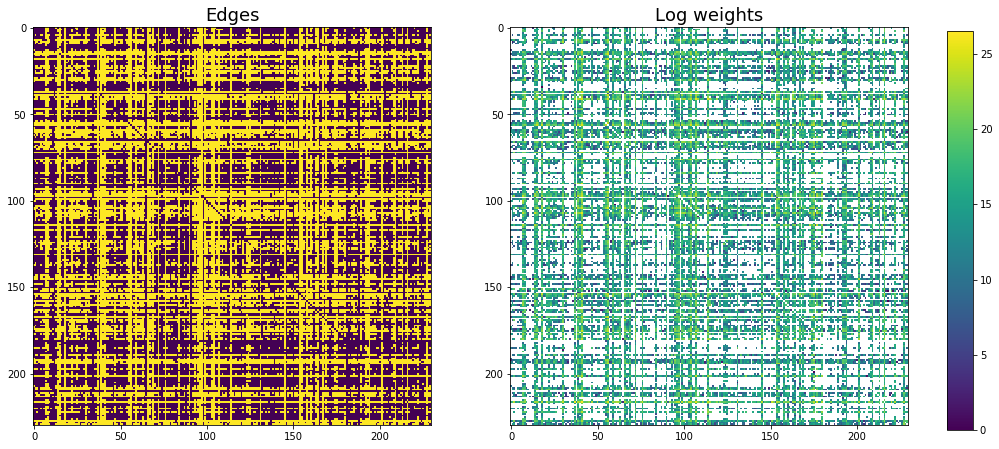

In [5]:
fig, axs = plt.subplots(1,2, figsize=(18,9))
axs[0].set_title('Edges', size=18)
axs[1].set_title('Log weights', size=18)
axs[0].imshow(A_edges.numpy(), cmap='viridis')
ax = axs[1].imshow(A.log().numpy(), cmap='viridis')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.188, 0.02, 0.615])
fig.colorbar(ax, cax=cbar_ax, aspect=30)
#plt.savefig('../examples/images/wt_A_orig.pdf')
plt.show()

## WSBM

We start the WSBM. Again, we assume that there is no more than 12 classes.

In [5]:
num_classes = 12
dataloader = DataLoader(EdgesDataset(A), batch_size=N*4, shuffle=True, num_workers=0)
vi = VI_WSBM(num_nodes=N, num_classes=num_classes)

In [6]:
vi.multi_train(dataloader, epochs=30, lrs = [0.1, 0.05, 0.01], trials=50)

>>>>>>> Training iteration #1 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 2010680.25 | Epoch time 1.00
Epoch 2 | LR: 0.10 | Total loss: 709273.56 | Epoch time 0.92
Epoch 3 | LR: 0.10 | Total loss: 562223.38 | Epoch time 0.84
Epoch 4 | LR: 0.10 | Total loss: 530122.19 | Epoch time 0.99
Epoch 5 | LR: 0.10 | Total loss: 515596.28 | Epoch time 0.99
Epoch 6 | LR: 0.10 | Total loss: 505751.03 | Epoch time 0.97
Epoch 7 | LR: 0.10 | Total loss: 498125.03 | Epoch time 1.09
Epoch 8 | LR: 0.10 | Total loss: 491127.75 | Epoch time 1.06
Epoch 9 | LR: 0.10 | Total loss: 483177.06 | Epoch time 0.92
Epoch 10 | LR: 0.10 | Total loss: 474396.75 | Epoch time 0.97
Epoch 11 | LR: 0.10 | Total loss: 467185.12 | Epoch time 0.86
Epoch 12 | LR: 0.10 | Total loss: 462236.88 | Epoch time 0.82
Epoch 13 | LR: 0.10 | Total loss: 458853.12 | Epoch time 0.82
Epoch 14 | LR: 0.10 | Total loss: 456435.53 | Epoch time 0.81
Epoch 15 | LR: 0.10 | Total loss: 454586.84 | Epoch time 0.82
Epoch 16 | LR: 

Epoch 41 | LR: 0.05 | Total loss: 444002.72 | Epoch time 0.94
Epoch 42 | LR: 0.05 | Total loss: 443956.94 | Epoch time 1.05
Epoch 43 | LR: 0.05 | Total loss: 443904.06 | Epoch time 1.25
Epoch 44 | LR: 0.05 | Total loss: 443877.41 | Epoch time 1.35
Epoch 45 | LR: 0.05 | Total loss: 443845.41 | Epoch time 1.59
Epoch 46 | LR: 0.05 | Total loss: 443792.31 | Epoch time 1.30
Epoch 47 | LR: 0.05 | Total loss: 443755.03 | Epoch time 1.46
Epoch 48 | LR: 0.05 | Total loss: 443726.66 | Epoch time 1.53
Epoch 49 | LR: 0.05 | Total loss: 443667.31 | Epoch time 1.35
Epoch 50 | LR: 0.05 | Total loss: 443651.38 | Epoch time 1.19
Epoch 51 | LR: 0.05 | Total loss: 443612.56 | Epoch time 1.03
Epoch 52 | LR: 0.05 | Total loss: 443587.88 | Epoch time 1.01
Epoch 53 | LR: 0.05 | Total loss: 443568.97 | Epoch time 0.98
Epoch 54 | LR: 0.05 | Total loss: 443544.38 | Epoch time 1.34
Epoch 55 | LR: 0.05 | Total loss: 443533.47 | Epoch time 0.96
Epoch 56 | LR: 0.05 | Total loss: 443516.94 | Epoch time 0.92
Epoch 57

Epoch 82 | LR: 0.01 | Total loss: 443755.78 | Epoch time 1.17
Epoch 83 | LR: 0.01 | Total loss: 443753.06 | Epoch time 1.02
Epoch 84 | LR: 0.01 | Total loss: 443743.94 | Epoch time 1.03
Epoch 85 | LR: 0.01 | Total loss: 443743.75 | Epoch time 0.92
Epoch 86 | LR: 0.01 | Total loss: 443719.44 | Epoch time 1.17
Epoch 87 | LR: 0.01 | Total loss: 443711.16 | Epoch time 1.10
Epoch 88 | LR: 0.01 | Total loss: 443713.59 | Epoch time 1.18
Epoch 89 | LR: 0.01 | Total loss: 443713.06 | Epoch time 1.03
Epoch 90 | LR: 0.01 | Total loss: 443690.41 | Epoch time 0.95
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #4 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 2028947.75 | Epoch time 0.93
Epoch 2 | LR: 0.10 | Total loss: 695465.88 | Epoch time 0.94
Epoch 3 | LR: 0.10 | Total loss: 559385.38 | Epoch time 0.95
Epoch 4 | LR: 0.10 | Total loss: 527951.88 | Epoch time 0.90
Epoch 5 | LR: 0.10 | Total loss: 514836.50 | Epoch time 0.94
Epoch 6 | LR: 0.10 | Total loss: 5065

Epoch 32 | LR: 0.05 | Total loss: 444531.38 | Epoch time 1.13
Epoch 33 | LR: 0.05 | Total loss: 444433.47 | Epoch time 1.20
Epoch 34 | LR: 0.05 | Total loss: 444346.97 | Epoch time 1.12
Epoch 35 | LR: 0.05 | Total loss: 444258.84 | Epoch time 1.22
Epoch 36 | LR: 0.05 | Total loss: 444185.00 | Epoch time 1.31
Epoch 37 | LR: 0.05 | Total loss: 444107.69 | Epoch time 1.14
Epoch 38 | LR: 0.05 | Total loss: 444060.88 | Epoch time 1.18
Epoch 39 | LR: 0.05 | Total loss: 444006.84 | Epoch time 1.12
Epoch 40 | LR: 0.05 | Total loss: 443972.00 | Epoch time 1.17
Epoch 41 | LR: 0.05 | Total loss: 443955.34 | Epoch time 1.30
Epoch 42 | LR: 0.05 | Total loss: 443896.22 | Epoch time 1.35
Epoch 43 | LR: 0.05 | Total loss: 443842.28 | Epoch time 1.17
Epoch 44 | LR: 0.05 | Total loss: 443795.84 | Epoch time 1.17
Epoch 45 | LR: 0.05 | Total loss: 443745.34 | Epoch time 1.41
Epoch 46 | LR: 0.05 | Total loss: 443697.38 | Epoch time 1.27
Epoch 47 | LR: 0.05 | Total loss: 443673.84 | Epoch time 1.24
Epoch 48

Epoch 73 | LR: 0.01 | Total loss: 442531.34 | Epoch time 1.36
Epoch 74 | LR: 0.01 | Total loss: 442517.31 | Epoch time 1.29
Epoch 75 | LR: 0.01 | Total loss: 442510.12 | Epoch time 1.20
Epoch 76 | LR: 0.01 | Total loss: 442498.16 | Epoch time 1.16
Epoch 77 | LR: 0.01 | Total loss: 442511.31 | Epoch time 1.17
Epoch 78 | LR: 0.01 | Total loss: 442503.56 | Epoch time 1.02
Epoch 79 | LR: 0.01 | Total loss: 442488.97 | Epoch time 1.02
Epoch 80 | LR: 0.01 | Total loss: 442477.19 | Epoch time 1.02
Epoch 81 | LR: 0.01 | Total loss: 442482.00 | Epoch time 1.04
Epoch 82 | LR: 0.01 | Total loss: 442468.66 | Epoch time 1.07
Epoch 83 | LR: 0.01 | Total loss: 442465.38 | Epoch time 1.63
Epoch 84 | LR: 0.01 | Total loss: 442467.91 | Epoch time 1.26
Epoch 85 | LR: 0.01 | Total loss: 442451.12 | Epoch time 1.09
Epoch 86 | LR: 0.01 | Total loss: 442453.81 | Epoch time 1.04
Epoch 87 | LR: 0.01 | Total loss: 442440.88 | Epoch time 1.15
Epoch 88 | LR: 0.01 | Total loss: 442459.00 | Epoch time 1.10
Epoch 89

Epoch 23 | LR: 0.10 | Total loss: 445022.06 | Epoch time 1.07
Epoch 24 | LR: 0.10 | Total loss: 444794.91 | Epoch time 1.04
Epoch 25 | LR: 0.10 | Total loss: 444613.00 | Epoch time 1.13
Epoch 26 | LR: 0.10 | Total loss: 444463.84 | Epoch time 1.02
Epoch 27 | LR: 0.10 | Total loss: 444335.69 | Epoch time 1.05
Epoch 28 | LR: 0.10 | Total loss: 444211.66 | Epoch time 1.05
Epoch 29 | LR: 0.10 | Total loss: 444107.69 | Epoch time 1.15
Epoch 30 | LR: 0.10 | Total loss: 444015.94 | Epoch time 1.04
Epoch 31 | LR: 0.05 | Total loss: 443957.94 | Epoch time 1.06
Epoch 32 | LR: 0.05 | Total loss: 443875.25 | Epoch time 1.04
Epoch 33 | LR: 0.05 | Total loss: 443801.88 | Epoch time 1.05
Epoch 34 | LR: 0.05 | Total loss: 443747.66 | Epoch time 1.04
Epoch 35 | LR: 0.05 | Total loss: 443686.50 | Epoch time 1.02
Epoch 36 | LR: 0.05 | Total loss: 443637.25 | Epoch time 1.00
Epoch 37 | LR: 0.05 | Total loss: 443606.19 | Epoch time 1.03
Epoch 38 | LR: 0.05 | Total loss: 443559.47 | Epoch time 1.02
Epoch 39

Epoch 64 | LR: 0.01 | Total loss: 443330.00 | Epoch time 1.13
Epoch 65 | LR: 0.01 | Total loss: 443299.28 | Epoch time 1.19
Epoch 66 | LR: 0.01 | Total loss: 443298.38 | Epoch time 1.18
Epoch 67 | LR: 0.01 | Total loss: 443279.72 | Epoch time 1.13
Epoch 68 | LR: 0.01 | Total loss: 443262.66 | Epoch time 1.17
Epoch 69 | LR: 0.01 | Total loss: 443273.75 | Epoch time 1.06
Epoch 70 | LR: 0.01 | Total loss: 443253.62 | Epoch time 1.04
Epoch 71 | LR: 0.01 | Total loss: 443254.06 | Epoch time 1.10
Epoch 72 | LR: 0.01 | Total loss: 443226.66 | Epoch time 1.04
Epoch 73 | LR: 0.01 | Total loss: 443213.34 | Epoch time 1.02
Epoch 74 | LR: 0.01 | Total loss: 443216.84 | Epoch time 1.07
Epoch 75 | LR: 0.01 | Total loss: 443200.50 | Epoch time 1.04
Epoch 76 | LR: 0.01 | Total loss: 443186.50 | Epoch time 1.06
Epoch 77 | LR: 0.01 | Total loss: 443174.44 | Epoch time 1.07
Epoch 78 | LR: 0.01 | Total loss: 443157.62 | Epoch time 1.11
Epoch 79 | LR: 0.01 | Total loss: 443158.94 | Epoch time 1.08
Epoch 80

Epoch 14 | LR: 0.10 | Total loss: 457785.50 | Epoch time 1.06
Epoch 15 | LR: 0.10 | Total loss: 455663.25 | Epoch time 1.09
Epoch 16 | LR: 0.10 | Total loss: 453938.56 | Epoch time 1.07
Epoch 17 | LR: 0.10 | Total loss: 452558.75 | Epoch time 1.13
Epoch 18 | LR: 0.10 | Total loss: 451432.59 | Epoch time 1.13
Epoch 19 | LR: 0.10 | Total loss: 450574.84 | Epoch time 1.06
Epoch 20 | LR: 0.10 | Total loss: 449894.62 | Epoch time 1.20
Epoch 21 | LR: 0.10 | Total loss: 449370.34 | Epoch time 1.42
Epoch 22 | LR: 0.10 | Total loss: 448928.84 | Epoch time 1.49
Epoch 23 | LR: 0.10 | Total loss: 448528.53 | Epoch time 1.33
Epoch 24 | LR: 0.10 | Total loss: 448197.88 | Epoch time 1.36
Epoch 25 | LR: 0.10 | Total loss: 447900.41 | Epoch time 1.05
Epoch 26 | LR: 0.10 | Total loss: 447657.31 | Epoch time 1.12
Epoch 27 | LR: 0.10 | Total loss: 447417.75 | Epoch time 1.18
Epoch 28 | LR: 0.10 | Total loss: 447214.28 | Epoch time 1.39
Epoch 29 | LR: 0.10 | Total loss: 446994.28 | Epoch time 1.27
Epoch 30

Epoch 55 | LR: 0.05 | Total loss: 443443.22 | Epoch time 1.21
Epoch 56 | LR: 0.05 | Total loss: 443451.38 | Epoch time 1.26
Epoch 57 | LR: 0.05 | Total loss: 443428.19 | Epoch time 1.19
Epoch 58 | LR: 0.05 | Total loss: 443419.94 | Epoch time 1.30
Epoch 59 | LR: 0.05 | Total loss: 443380.75 | Epoch time 1.22
Epoch 60 | LR: 0.05 | Total loss: 443386.22 | Epoch time 1.11
Epoch 61 | LR: 0.01 | Total loss: 443364.69 | Epoch time 1.04
Epoch 62 | LR: 0.01 | Total loss: 443365.47 | Epoch time 1.05
Epoch 63 | LR: 0.01 | Total loss: 443341.22 | Epoch time 1.04
Epoch 64 | LR: 0.01 | Total loss: 443335.34 | Epoch time 1.14
Epoch 65 | LR: 0.01 | Total loss: 443314.53 | Epoch time 1.09
Epoch 66 | LR: 0.01 | Total loss: 443309.38 | Epoch time 1.26
Epoch 67 | LR: 0.01 | Total loss: 443322.69 | Epoch time 1.40
Epoch 68 | LR: 0.01 | Total loss: 443284.22 | Epoch time 1.40
Epoch 69 | LR: 0.01 | Total loss: 443280.31 | Epoch time 1.40
Epoch 70 | LR: 0.01 | Total loss: 443290.16 | Epoch time 1.29
Epoch 71

Epoch 5 | LR: 0.10 | Total loss: 512578.88 | Epoch time 1.16
Epoch 6 | LR: 0.10 | Total loss: 503536.94 | Epoch time 1.04
Epoch 7 | LR: 0.10 | Total loss: 494820.12 | Epoch time 1.01
Epoch 8 | LR: 0.10 | Total loss: 486433.81 | Epoch time 1.17
Epoch 9 | LR: 0.10 | Total loss: 479063.44 | Epoch time 1.20
Epoch 10 | LR: 0.10 | Total loss: 472984.94 | Epoch time 1.28
Epoch 11 | LR: 0.10 | Total loss: 468101.22 | Epoch time 1.02
Epoch 12 | LR: 0.10 | Total loss: 464147.44 | Epoch time 0.99
Epoch 13 | LR: 0.10 | Total loss: 460956.06 | Epoch time 0.95
Epoch 14 | LR: 0.10 | Total loss: 458428.59 | Epoch time 1.22
Epoch 15 | LR: 0.10 | Total loss: 456365.41 | Epoch time 1.25
Epoch 16 | LR: 0.10 | Total loss: 454672.31 | Epoch time 1.67
Epoch 17 | LR: 0.10 | Total loss: 453318.38 | Epoch time 1.78
Epoch 18 | LR: 0.10 | Total loss: 452236.75 | Epoch time 1.26
Epoch 19 | LR: 0.10 | Total loss: 451335.12 | Epoch time 1.25
Epoch 20 | LR: 0.10 | Total loss: 450551.03 | Epoch time 1.19
Epoch 21 | LR

Epoch 46 | LR: 0.05 | Total loss: 448531.25 | Epoch time 0.94
Epoch 47 | LR: 0.05 | Total loss: 448465.62 | Epoch time 0.91
Epoch 48 | LR: 0.05 | Total loss: 448407.00 | Epoch time 0.97
Epoch 49 | LR: 0.05 | Total loss: 448351.06 | Epoch time 0.93
Epoch 50 | LR: 0.05 | Total loss: 448260.69 | Epoch time 0.98
Epoch 51 | LR: 0.05 | Total loss: 448177.94 | Epoch time 0.97
Epoch 52 | LR: 0.05 | Total loss: 448081.22 | Epoch time 1.00
Epoch 53 | LR: 0.05 | Total loss: 447976.72 | Epoch time 0.92
Epoch 54 | LR: 0.05 | Total loss: 447862.78 | Epoch time 0.91
Epoch 55 | LR: 0.05 | Total loss: 447745.16 | Epoch time 0.93
Epoch 56 | LR: 0.05 | Total loss: 447638.91 | Epoch time 0.91
Epoch 57 | LR: 0.05 | Total loss: 447559.41 | Epoch time 0.99
Epoch 58 | LR: 0.05 | Total loss: 447506.78 | Epoch time 0.92
Epoch 59 | LR: 0.05 | Total loss: 447440.31 | Epoch time 0.90
Epoch 60 | LR: 0.05 | Total loss: 447374.28 | Epoch time 0.92
Epoch 61 | LR: 0.01 | Total loss: 447312.91 | Epoch time 0.91
Epoch 62

Epoch 87 | LR: 0.01 | Total loss: 443169.84 | Epoch time 0.93
Epoch 88 | LR: 0.01 | Total loss: 443169.25 | Epoch time 0.92
Epoch 89 | LR: 0.01 | Total loss: 443153.38 | Epoch time 0.93
Epoch 90 | LR: 0.01 | Total loss: 443143.62 | Epoch time 0.93
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #17 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 1993136.12 | Epoch time 0.91
Epoch 2 | LR: 0.10 | Total loss: 676846.44 | Epoch time 0.93
Epoch 3 | LR: 0.10 | Total loss: 552588.44 | Epoch time 0.94
Epoch 4 | LR: 0.10 | Total loss: 524858.12 | Epoch time 0.94
Epoch 5 | LR: 0.10 | Total loss: 512718.47 | Epoch time 0.98
Epoch 6 | LR: 0.10 | Total loss: 504714.97 | Epoch time 0.94
Epoch 7 | LR: 0.10 | Total loss: 498188.72 | Epoch time 0.96
Epoch 8 | LR: 0.10 | Total loss: 491826.78 | Epoch time 0.93
Epoch 9 | LR: 0.10 | Total loss: 484491.72 | Epoch time 1.03
Epoch 10 | LR: 0.10 | Total loss: 476642.38 | Epoch time 0.93
Epoch 11 | LR: 0.10 | Total loss: 469947

Epoch 37 | LR: 0.05 | Total loss: 443490.66 | Epoch time 1.02
Epoch 38 | LR: 0.05 | Total loss: 443437.34 | Epoch time 1.62
Epoch 39 | LR: 0.05 | Total loss: 443407.97 | Epoch time 1.64
Epoch 40 | LR: 0.05 | Total loss: 443369.81 | Epoch time 1.54
Epoch 41 | LR: 0.05 | Total loss: 443334.88 | Epoch time 1.64
Epoch 42 | LR: 0.05 | Total loss: 443306.62 | Epoch time 1.51
Epoch 43 | LR: 0.05 | Total loss: 443299.22 | Epoch time 1.35
Epoch 44 | LR: 0.05 | Total loss: 443283.56 | Epoch time 1.32
Epoch 45 | LR: 0.05 | Total loss: 443267.78 | Epoch time 1.45
Epoch 46 | LR: 0.05 | Total loss: 443236.84 | Epoch time 2.36
Epoch 47 | LR: 0.05 | Total loss: 443226.28 | Epoch time 1.73
Epoch 48 | LR: 0.05 | Total loss: 443215.22 | Epoch time 1.25
Epoch 49 | LR: 0.05 | Total loss: 443201.78 | Epoch time 1.25
Epoch 50 | LR: 0.05 | Total loss: 443182.34 | Epoch time 1.50
Epoch 51 | LR: 0.05 | Total loss: 443175.59 | Epoch time 1.93
Epoch 52 | LR: 0.05 | Total loss: 443162.25 | Epoch time 1.30
Epoch 53

Epoch 78 | LR: 0.01 | Total loss: 442964.47 | Epoch time 1.27
Epoch 79 | LR: 0.01 | Total loss: 442940.47 | Epoch time 1.22
Epoch 80 | LR: 0.01 | Total loss: 442935.22 | Epoch time 1.04
Epoch 81 | LR: 0.01 | Total loss: 442923.28 | Epoch time 1.56
Epoch 82 | LR: 0.01 | Total loss: 442902.59 | Epoch time 1.30
Epoch 83 | LR: 0.01 | Total loss: 442900.75 | Epoch time 1.30
Epoch 84 | LR: 0.01 | Total loss: 442884.56 | Epoch time 1.05
Epoch 85 | LR: 0.01 | Total loss: 442873.34 | Epoch time 1.06
Epoch 86 | LR: 0.01 | Total loss: 442881.44 | Epoch time 1.10
Epoch 87 | LR: 0.01 | Total loss: 442857.41 | Epoch time 1.05
Epoch 88 | LR: 0.01 | Total loss: 442871.09 | Epoch time 1.03
Epoch 89 | LR: 0.01 | Total loss: 442837.88 | Epoch time 1.03
Epoch 90 | LR: 0.01 | Total loss: 442832.91 | Epoch time 0.99
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #20 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 2014416.25 | Epoch time 1.00
Epoch 2 | LR: 0.10 | Total loss:

Epoch 28 | LR: 0.10 | Total loss: 447993.53 | Epoch time 0.94
Epoch 29 | LR: 0.10 | Total loss: 447725.31 | Epoch time 0.96
Epoch 30 | LR: 0.10 | Total loss: 447442.97 | Epoch time 0.94
Epoch 31 | LR: 0.05 | Total loss: 447231.53 | Epoch time 0.97
Epoch 32 | LR: 0.05 | Total loss: 447041.94 | Epoch time 0.95
Epoch 33 | LR: 0.05 | Total loss: 446899.09 | Epoch time 0.97
Epoch 34 | LR: 0.05 | Total loss: 446725.09 | Epoch time 0.94
Epoch 35 | LR: 0.05 | Total loss: 446532.56 | Epoch time 1.11
Epoch 36 | LR: 0.05 | Total loss: 446305.16 | Epoch time 1.26
Epoch 37 | LR: 0.05 | Total loss: 446052.47 | Epoch time 1.19
Epoch 38 | LR: 0.05 | Total loss: 445751.16 | Epoch time 1.22
Epoch 39 | LR: 0.05 | Total loss: 445451.28 | Epoch time 1.20
Epoch 40 | LR: 0.05 | Total loss: 445247.31 | Epoch time 1.25
Epoch 41 | LR: 0.05 | Total loss: 445048.72 | Epoch time 1.23
Epoch 42 | LR: 0.05 | Total loss: 444886.91 | Epoch time 1.21
Epoch 43 | LR: 0.05 | Total loss: 444783.09 | Epoch time 1.20
Epoch 44

Epoch 69 | LR: 0.01 | Total loss: 443262.12 | Epoch time 1.01
Epoch 70 | LR: 0.01 | Total loss: 443255.88 | Epoch time 1.00
Epoch 71 | LR: 0.01 | Total loss: 443236.16 | Epoch time 0.95
Epoch 72 | LR: 0.01 | Total loss: 443251.06 | Epoch time 0.96
Epoch 73 | LR: 0.01 | Total loss: 443250.50 | Epoch time 0.95
Epoch 74 | LR: 0.01 | Total loss: 443240.25 | Epoch time 0.94
Epoch 75 | LR: 0.01 | Total loss: 443247.03 | Epoch time 0.97
Epoch 76 | LR: 0.01 | Total loss: 443218.41 | Epoch time 0.95
Epoch 77 | LR: 0.01 | Total loss: 443227.09 | Epoch time 0.97
Epoch 78 | LR: 0.01 | Total loss: 443235.88 | Epoch time 1.00
Epoch 79 | LR: 0.01 | Total loss: 443226.16 | Epoch time 0.98
Epoch 80 | LR: 0.01 | Total loss: 443232.94 | Epoch time 0.98
Epoch 81 | LR: 0.01 | Total loss: 443214.91 | Epoch time 0.95
Epoch 82 | LR: 0.01 | Total loss: 443213.03 | Epoch time 1.01
Epoch 83 | LR: 0.01 | Total loss: 443220.62 | Epoch time 0.99
Epoch 84 | LR: 0.01 | Total loss: 443224.94 | Epoch time 0.96
Epoch 85

Epoch 19 | LR: 0.10 | Total loss: 448335.62 | Epoch time 0.90
Epoch 20 | LR: 0.10 | Total loss: 447610.38 | Epoch time 0.91
Epoch 21 | LR: 0.10 | Total loss: 447030.12 | Epoch time 0.91
Epoch 22 | LR: 0.10 | Total loss: 446551.59 | Epoch time 0.92
Epoch 23 | LR: 0.10 | Total loss: 446189.44 | Epoch time 0.91
Epoch 24 | LR: 0.10 | Total loss: 445905.88 | Epoch time 0.93
Epoch 25 | LR: 0.10 | Total loss: 445668.47 | Epoch time 0.93
Epoch 26 | LR: 0.10 | Total loss: 445463.81 | Epoch time 0.91
Epoch 27 | LR: 0.10 | Total loss: 445298.00 | Epoch time 0.92
Epoch 28 | LR: 0.10 | Total loss: 445143.44 | Epoch time 0.91
Epoch 29 | LR: 0.10 | Total loss: 445029.25 | Epoch time 0.95
Epoch 30 | LR: 0.10 | Total loss: 444891.81 | Epoch time 0.90
Epoch 31 | LR: 0.05 | Total loss: 444801.97 | Epoch time 0.89
Epoch 32 | LR: 0.05 | Total loss: 444710.44 | Epoch time 0.91
Epoch 33 | LR: 0.05 | Total loss: 444616.19 | Epoch time 0.90
Epoch 34 | LR: 0.05 | Total loss: 444538.97 | Epoch time 0.91
Epoch 35

Epoch 60 | LR: 0.05 | Total loss: 443416.91 | Epoch time 0.93
Epoch 61 | LR: 0.01 | Total loss: 443410.25 | Epoch time 0.95
Epoch 62 | LR: 0.01 | Total loss: 443411.41 | Epoch time 1.19
Epoch 63 | LR: 0.01 | Total loss: 443391.81 | Epoch time 0.95
Epoch 64 | LR: 0.01 | Total loss: 443370.31 | Epoch time 0.99
Epoch 65 | LR: 0.01 | Total loss: 443369.91 | Epoch time 0.94
Epoch 66 | LR: 0.01 | Total loss: 443383.44 | Epoch time 0.98
Epoch 67 | LR: 0.01 | Total loss: 443367.09 | Epoch time 0.95
Epoch 68 | LR: 0.01 | Total loss: 443337.69 | Epoch time 0.96
Epoch 69 | LR: 0.01 | Total loss: 443333.38 | Epoch time 0.95
Epoch 70 | LR: 0.01 | Total loss: 443323.19 | Epoch time 0.97
Epoch 71 | LR: 0.01 | Total loss: 443292.44 | Epoch time 0.97
Epoch 72 | LR: 0.01 | Total loss: 443296.47 | Epoch time 0.97
Epoch 73 | LR: 0.01 | Total loss: 443289.34 | Epoch time 0.98
Epoch 74 | LR: 0.01 | Total loss: 443267.00 | Epoch time 0.96
Epoch 75 | LR: 0.01 | Total loss: 443260.28 | Epoch time 0.97
Epoch 76

Epoch 10 | LR: 0.10 | Total loss: 473521.97 | Epoch time 0.96
Epoch 11 | LR: 0.10 | Total loss: 467502.06 | Epoch time 0.95
Epoch 12 | LR: 0.10 | Total loss: 462604.62 | Epoch time 0.96
Epoch 13 | LR: 0.10 | Total loss: 458764.19 | Epoch time 0.92
Epoch 14 | LR: 0.10 | Total loss: 455692.19 | Epoch time 0.94
Epoch 15 | LR: 0.10 | Total loss: 453232.75 | Epoch time 0.94
Epoch 16 | LR: 0.10 | Total loss: 451296.31 | Epoch time 0.95
Epoch 17 | LR: 0.10 | Total loss: 449783.16 | Epoch time 0.94
Epoch 18 | LR: 0.10 | Total loss: 448626.25 | Epoch time 0.93
Epoch 19 | LR: 0.10 | Total loss: 447712.12 | Epoch time 0.93
Epoch 20 | LR: 0.10 | Total loss: 447009.66 | Epoch time 0.92
Epoch 21 | LR: 0.10 | Total loss: 446453.56 | Epoch time 0.95
Epoch 22 | LR: 0.10 | Total loss: 446010.25 | Epoch time 0.92
Epoch 23 | LR: 0.10 | Total loss: 445671.00 | Epoch time 0.93
Epoch 24 | LR: 0.10 | Total loss: 445389.50 | Epoch time 0.95
Epoch 25 | LR: 0.10 | Total loss: 445174.00 | Epoch time 0.94
Epoch 26

Epoch 51 | LR: 0.05 | Total loss: 443134.97 | Epoch time 0.92
Epoch 52 | LR: 0.05 | Total loss: 443092.88 | Epoch time 0.93
Epoch 53 | LR: 0.05 | Total loss: 443077.56 | Epoch time 0.92
Epoch 54 | LR: 0.05 | Total loss: 443073.88 | Epoch time 0.93
Epoch 55 | LR: 0.05 | Total loss: 443044.00 | Epoch time 0.92
Epoch 56 | LR: 0.05 | Total loss: 443021.62 | Epoch time 0.94
Epoch 57 | LR: 0.05 | Total loss: 443004.97 | Epoch time 0.95
Epoch 58 | LR: 0.05 | Total loss: 442997.66 | Epoch time 0.92
Epoch 59 | LR: 0.05 | Total loss: 442969.72 | Epoch time 0.93
Epoch 60 | LR: 0.05 | Total loss: 442959.22 | Epoch time 0.93
Epoch 61 | LR: 0.01 | Total loss: 442950.00 | Epoch time 0.94
Epoch 62 | LR: 0.01 | Total loss: 442944.12 | Epoch time 0.93
Epoch 63 | LR: 0.01 | Total loss: 442924.44 | Epoch time 0.92
Epoch 64 | LR: 0.01 | Total loss: 442900.88 | Epoch time 0.92
Epoch 65 | LR: 0.01 | Total loss: 442900.75 | Epoch time 0.90
Epoch 66 | LR: 0.01 | Total loss: 442890.56 | Epoch time 0.93
Epoch 67

Epoch 1 | LR: 0.10 | Total loss: 2009603.38 | Epoch time 0.93
Epoch 2 | LR: 0.10 | Total loss: 703465.38 | Epoch time 0.93
Epoch 3 | LR: 0.10 | Total loss: 560254.12 | Epoch time 0.92
Epoch 4 | LR: 0.10 | Total loss: 527178.44 | Epoch time 0.90
Epoch 5 | LR: 0.10 | Total loss: 512034.22 | Epoch time 0.91
Epoch 6 | LR: 0.10 | Total loss: 501971.62 | Epoch time 0.91
Epoch 7 | LR: 0.10 | Total loss: 494008.12 | Epoch time 0.88
Epoch 8 | LR: 0.10 | Total loss: 487077.66 | Epoch time 0.89
Epoch 9 | LR: 0.10 | Total loss: 480712.50 | Epoch time 0.88
Epoch 10 | LR: 0.10 | Total loss: 474946.44 | Epoch time 0.88
Epoch 11 | LR: 0.10 | Total loss: 469906.22 | Epoch time 0.90
Epoch 12 | LR: 0.10 | Total loss: 465511.28 | Epoch time 0.89
Epoch 13 | LR: 0.10 | Total loss: 461102.91 | Epoch time 0.91
Epoch 14 | LR: 0.10 | Total loss: 456478.03 | Epoch time 0.88
Epoch 15 | LR: 0.10 | Total loss: 452957.25 | Epoch time 0.91
Epoch 16 | LR: 0.10 | Total loss: 450624.31 | Epoch time 0.94
Epoch 17 | LR: 0

Epoch 42 | LR: 0.05 | Total loss: 443831.94 | Epoch time 0.93
Epoch 43 | LR: 0.05 | Total loss: 443792.78 | Epoch time 0.95
Epoch 44 | LR: 0.05 | Total loss: 443778.19 | Epoch time 0.93
Epoch 45 | LR: 0.05 | Total loss: 443759.28 | Epoch time 0.93
Epoch 46 | LR: 0.05 | Total loss: 443735.28 | Epoch time 0.93
Epoch 47 | LR: 0.05 | Total loss: 443712.66 | Epoch time 0.92
Epoch 48 | LR: 0.05 | Total loss: 443704.47 | Epoch time 1.05
Epoch 49 | LR: 0.05 | Total loss: 443677.66 | Epoch time 0.92
Epoch 50 | LR: 0.05 | Total loss: 443670.53 | Epoch time 0.94
Epoch 51 | LR: 0.05 | Total loss: 443659.44 | Epoch time 0.92
Epoch 52 | LR: 0.05 | Total loss: 443633.16 | Epoch time 0.93
Epoch 53 | LR: 0.05 | Total loss: 443628.47 | Epoch time 0.95
Epoch 54 | LR: 0.05 | Total loss: 443618.16 | Epoch time 0.94
Epoch 55 | LR: 0.05 | Total loss: 443615.69 | Epoch time 0.95
Epoch 56 | LR: 0.05 | Total loss: 443604.50 | Epoch time 0.96
Epoch 57 | LR: 0.05 | Total loss: 443596.47 | Epoch time 0.94
Epoch 58

Epoch 83 | LR: 0.01 | Total loss: 443228.16 | Epoch time 0.94
Epoch 84 | LR: 0.01 | Total loss: 443210.69 | Epoch time 0.97
Epoch 85 | LR: 0.01 | Total loss: 443206.88 | Epoch time 0.96
Epoch 86 | LR: 0.01 | Total loss: 443209.25 | Epoch time 0.94
Epoch 87 | LR: 0.01 | Total loss: 443192.00 | Epoch time 0.95
Epoch 88 | LR: 0.01 | Total loss: 443198.16 | Epoch time 0.93
Epoch 89 | LR: 0.01 | Total loss: 443190.22 | Epoch time 0.97
Epoch 90 | LR: 0.01 | Total loss: 443192.56 | Epoch time 0.93
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #33 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 2136879.75 | Epoch time 0.91
Epoch 2 | LR: 0.10 | Total loss: 707975.38 | Epoch time 0.90
Epoch 3 | LR: 0.10 | Total loss: 563503.62 | Epoch time 0.93
Epoch 4 | LR: 0.10 | Total loss: 530248.75 | Epoch time 0.90
Epoch 5 | LR: 0.10 | Total loss: 516164.44 | Epoch time 0.91
Epoch 6 | LR: 0.10 | Total loss: 507244.03 | Epoch time 0.91
Epoch 7 | LR: 0.10 | Total loss: 4993

Epoch 33 | LR: 0.05 | Total loss: 447612.47 | Epoch time 1.02
Epoch 34 | LR: 0.05 | Total loss: 447562.12 | Epoch time 0.95
Epoch 35 | LR: 0.05 | Total loss: 447513.59 | Epoch time 0.93
Epoch 36 | LR: 0.05 | Total loss: 447467.34 | Epoch time 0.93
Epoch 37 | LR: 0.05 | Total loss: 447453.44 | Epoch time 1.02
Epoch 38 | LR: 0.05 | Total loss: 447399.62 | Epoch time 1.04
Epoch 39 | LR: 0.05 | Total loss: 447378.19 | Epoch time 1.01
Epoch 40 | LR: 0.05 | Total loss: 447330.16 | Epoch time 1.01
Epoch 41 | LR: 0.05 | Total loss: 447326.31 | Epoch time 0.99
Epoch 42 | LR: 0.05 | Total loss: 447296.84 | Epoch time 1.02
Epoch 43 | LR: 0.05 | Total loss: 447261.66 | Epoch time 1.04
Epoch 44 | LR: 0.05 | Total loss: 447232.09 | Epoch time 1.01
Epoch 45 | LR: 0.05 | Total loss: 447211.66 | Epoch time 1.01
Epoch 46 | LR: 0.05 | Total loss: 447177.78 | Epoch time 0.98
Epoch 47 | LR: 0.05 | Total loss: 447153.88 | Epoch time 0.99
Epoch 48 | LR: 0.05 | Total loss: 447130.47 | Epoch time 0.93
Epoch 49

Epoch 74 | LR: 0.01 | Total loss: 444024.97 | Epoch time 1.03
Epoch 75 | LR: 0.01 | Total loss: 443983.06 | Epoch time 0.97
Epoch 76 | LR: 0.01 | Total loss: 443959.62 | Epoch time 0.95
Epoch 77 | LR: 0.01 | Total loss: 443940.62 | Epoch time 0.95
Epoch 78 | LR: 0.01 | Total loss: 443912.81 | Epoch time 0.95
Epoch 79 | LR: 0.01 | Total loss: 443896.25 | Epoch time 0.93
Epoch 80 | LR: 0.01 | Total loss: 443856.09 | Epoch time 0.95
Epoch 81 | LR: 0.01 | Total loss: 443858.41 | Epoch time 0.92
Epoch 82 | LR: 0.01 | Total loss: 443830.72 | Epoch time 0.95
Epoch 83 | LR: 0.01 | Total loss: 443818.16 | Epoch time 0.95
Epoch 84 | LR: 0.01 | Total loss: 443806.84 | Epoch time 0.93
Epoch 85 | LR: 0.01 | Total loss: 443793.12 | Epoch time 0.93
Epoch 86 | LR: 0.01 | Total loss: 443786.53 | Epoch time 0.92
Epoch 87 | LR: 0.01 | Total loss: 443794.25 | Epoch time 0.95
Epoch 88 | LR: 0.01 | Total loss: 443782.72 | Epoch time 0.93
Epoch 89 | LR: 0.01 | Total loss: 443778.97 | Epoch time 0.94
Epoch 90

Epoch 24 | LR: 0.10 | Total loss: 444422.72 | Epoch time 0.90
Epoch 25 | LR: 0.10 | Total loss: 444196.16 | Epoch time 0.92
Epoch 26 | LR: 0.10 | Total loss: 444017.94 | Epoch time 1.00
Epoch 27 | LR: 0.10 | Total loss: 443867.72 | Epoch time 0.93
Epoch 28 | LR: 0.10 | Total loss: 443721.09 | Epoch time 0.91
Epoch 29 | LR: 0.10 | Total loss: 443605.44 | Epoch time 0.95
Epoch 30 | LR: 0.10 | Total loss: 443485.59 | Epoch time 0.92
Epoch 31 | LR: 0.05 | Total loss: 443369.31 | Epoch time 0.90
Epoch 32 | LR: 0.05 | Total loss: 443287.41 | Epoch time 0.92
Epoch 33 | LR: 0.05 | Total loss: 443181.72 | Epoch time 0.90
Epoch 34 | LR: 0.05 | Total loss: 443106.84 | Epoch time 0.90
Epoch 35 | LR: 0.05 | Total loss: 443011.06 | Epoch time 0.90
Epoch 36 | LR: 0.05 | Total loss: 442916.34 | Epoch time 0.90
Epoch 37 | LR: 0.05 | Total loss: 442843.91 | Epoch time 0.91
Epoch 38 | LR: 0.05 | Total loss: 442770.94 | Epoch time 0.89
Epoch 39 | LR: 0.05 | Total loss: 442691.03 | Epoch time 0.91
Epoch 40

Epoch 65 | LR: 0.01 | Total loss: 443749.06 | Epoch time 1.05
Epoch 66 | LR: 0.01 | Total loss: 443734.44 | Epoch time 0.97
Epoch 67 | LR: 0.01 | Total loss: 443709.03 | Epoch time 0.95
Epoch 68 | LR: 0.01 | Total loss: 443687.44 | Epoch time 1.03
Epoch 69 | LR: 0.01 | Total loss: 443672.56 | Epoch time 0.94
Epoch 70 | LR: 0.01 | Total loss: 443673.44 | Epoch time 0.95
Epoch 71 | LR: 0.01 | Total loss: 443683.47 | Epoch time 0.95
Epoch 72 | LR: 0.01 | Total loss: 443650.78 | Epoch time 0.92
Epoch 73 | LR: 0.01 | Total loss: 443643.66 | Epoch time 0.93
Epoch 74 | LR: 0.01 | Total loss: 443626.56 | Epoch time 0.93
Epoch 75 | LR: 0.01 | Total loss: 443629.47 | Epoch time 0.94
Epoch 76 | LR: 0.01 | Total loss: 443633.34 | Epoch time 0.94
Epoch 77 | LR: 0.01 | Total loss: 443613.62 | Epoch time 0.93
Epoch 78 | LR: 0.01 | Total loss: 443623.72 | Epoch time 0.94
Epoch 79 | LR: 0.01 | Total loss: 443606.34 | Epoch time 0.93
Epoch 80 | LR: 0.01 | Total loss: 443600.97 | Epoch time 0.97
Epoch 81

Epoch 15 | LR: 0.10 | Total loss: 452155.72 | Epoch time 0.93
Epoch 16 | LR: 0.10 | Total loss: 450190.50 | Epoch time 0.95
Epoch 17 | LR: 0.10 | Total loss: 448703.94 | Epoch time 0.93
Epoch 18 | LR: 0.10 | Total loss: 447565.50 | Epoch time 0.94
Epoch 19 | LR: 0.10 | Total loss: 446689.38 | Epoch time 1.01
Epoch 20 | LR: 0.10 | Total loss: 445999.94 | Epoch time 0.93
Epoch 21 | LR: 0.10 | Total loss: 445456.94 | Epoch time 0.94
Epoch 22 | LR: 0.10 | Total loss: 445034.91 | Epoch time 1.01
Epoch 23 | LR: 0.10 | Total loss: 444688.62 | Epoch time 1.15
Epoch 24 | LR: 0.10 | Total loss: 444399.66 | Epoch time 1.16
Epoch 25 | LR: 0.10 | Total loss: 444163.50 | Epoch time 1.13
Epoch 26 | LR: 0.10 | Total loss: 443975.03 | Epoch time 1.19
Epoch 27 | LR: 0.10 | Total loss: 443821.34 | Epoch time 1.15
Epoch 28 | LR: 0.10 | Total loss: 443682.16 | Epoch time 1.14
Epoch 29 | LR: 0.10 | Total loss: 443572.41 | Epoch time 1.18
Epoch 30 | LR: 0.10 | Total loss: 443479.06 | Epoch time 1.21
Epoch 31

Epoch 56 | LR: 0.05 | Total loss: 443831.84 | Epoch time 0.92
Epoch 57 | LR: 0.05 | Total loss: 443801.31 | Epoch time 0.93
Epoch 58 | LR: 0.05 | Total loss: 443782.38 | Epoch time 0.94
Epoch 59 | LR: 0.05 | Total loss: 443755.50 | Epoch time 0.94
Epoch 60 | LR: 0.05 | Total loss: 443727.19 | Epoch time 0.92
Epoch 61 | LR: 0.01 | Total loss: 443696.22 | Epoch time 1.00
Epoch 62 | LR: 0.01 | Total loss: 443646.94 | Epoch time 0.93
Epoch 63 | LR: 0.01 | Total loss: 443650.84 | Epoch time 0.91
Epoch 64 | LR: 0.01 | Total loss: 443617.88 | Epoch time 0.93
Epoch 65 | LR: 0.01 | Total loss: 443586.19 | Epoch time 0.90
Epoch 66 | LR: 0.01 | Total loss: 443550.56 | Epoch time 0.93
Epoch 67 | LR: 0.01 | Total loss: 443508.97 | Epoch time 0.92
Epoch 68 | LR: 0.01 | Total loss: 443489.50 | Epoch time 0.91
Epoch 69 | LR: 0.01 | Total loss: 443459.94 | Epoch time 0.93
Epoch 70 | LR: 0.01 | Total loss: 443440.69 | Epoch time 0.93
Epoch 71 | LR: 0.01 | Total loss: 443434.28 | Epoch time 1.13
Epoch 72

Epoch 6 | LR: 0.10 | Total loss: 498479.28 | Epoch time 1.01
Epoch 7 | LR: 0.10 | Total loss: 490731.19 | Epoch time 0.99
Epoch 8 | LR: 0.10 | Total loss: 483712.19 | Epoch time 1.02
Epoch 9 | LR: 0.10 | Total loss: 477353.53 | Epoch time 0.99
Epoch 10 | LR: 0.10 | Total loss: 471854.59 | Epoch time 1.01
Epoch 11 | LR: 0.10 | Total loss: 467407.56 | Epoch time 1.02
Epoch 12 | LR: 0.10 | Total loss: 463951.66 | Epoch time 1.28
Epoch 13 | LR: 0.10 | Total loss: 461261.56 | Epoch time 1.15
Epoch 14 | LR: 0.10 | Total loss: 459128.69 | Epoch time 1.10
Epoch 15 | LR: 0.10 | Total loss: 457381.25 | Epoch time 1.10
Epoch 16 | LR: 0.10 | Total loss: 455847.56 | Epoch time 1.10
Epoch 17 | LR: 0.10 | Total loss: 454474.88 | Epoch time 1.07
Epoch 18 | LR: 0.10 | Total loss: 453201.34 | Epoch time 1.08
Epoch 19 | LR: 0.10 | Total loss: 452084.72 | Epoch time 1.07
Epoch 20 | LR: 0.10 | Total loss: 451185.88 | Epoch time 1.08
Epoch 21 | LR: 0.10 | Total loss: 450439.47 | Epoch time 1.06
Epoch 22 | L

Epoch 47 | LR: 0.05 | Total loss: 443521.38 | Epoch time 1.04
Epoch 48 | LR: 0.05 | Total loss: 443477.75 | Epoch time 1.04
Epoch 49 | LR: 0.05 | Total loss: 443467.81 | Epoch time 1.09
Epoch 50 | LR: 0.05 | Total loss: 443419.94 | Epoch time 1.10
Epoch 51 | LR: 0.05 | Total loss: 443384.09 | Epoch time 1.05
Epoch 52 | LR: 0.05 | Total loss: 443368.16 | Epoch time 1.12
Epoch 53 | LR: 0.05 | Total loss: 443340.59 | Epoch time 1.11
Epoch 54 | LR: 0.05 | Total loss: 443317.44 | Epoch time 1.19
Epoch 55 | LR: 0.05 | Total loss: 443283.69 | Epoch time 1.08
Epoch 56 | LR: 0.05 | Total loss: 443253.22 | Epoch time 1.05
Epoch 57 | LR: 0.05 | Total loss: 443218.41 | Epoch time 1.06
Epoch 58 | LR: 0.05 | Total loss: 443187.22 | Epoch time 1.08
Epoch 59 | LR: 0.05 | Total loss: 443168.72 | Epoch time 1.03
Epoch 60 | LR: 0.05 | Total loss: 443135.53 | Epoch time 1.08
Epoch 61 | LR: 0.01 | Total loss: 443103.84 | Epoch time 1.07
Epoch 62 | LR: 0.01 | Total loss: 443087.91 | Epoch time 1.09
Epoch 63

Epoch 88 | LR: 0.01 | Total loss: 443166.31 | Epoch time 0.91
Epoch 89 | LR: 0.01 | Total loss: 443114.44 | Epoch time 0.92
Epoch 90 | LR: 0.01 | Total loss: 443131.88 | Epoch time 0.93
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #46 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 1949859.62 | Epoch time 0.92
Epoch 2 | LR: 0.10 | Total loss: 696222.06 | Epoch time 0.91
Epoch 3 | LR: 0.10 | Total loss: 560250.62 | Epoch time 0.91
Epoch 4 | LR: 0.10 | Total loss: 529700.19 | Epoch time 0.93
Epoch 5 | LR: 0.10 | Total loss: 516085.88 | Epoch time 0.89
Epoch 6 | LR: 0.10 | Total loss: 506436.81 | Epoch time 0.98
Epoch 7 | LR: 0.10 | Total loss: 497859.53 | Epoch time 0.91
Epoch 8 | LR: 0.10 | Total loss: 489921.19 | Epoch time 0.90
Epoch 9 | LR: 0.10 | Total loss: 482598.19 | Epoch time 0.94
Epoch 10 | LR: 0.10 | Total loss: 475594.34 | Epoch time 1.02
Epoch 11 | LR: 0.10 | Total loss: 468631.25 | Epoch time 1.10
Epoch 12 | LR: 0.10 | Total loss: 462518

Epoch 38 | LR: 0.05 | Total loss: 444883.91 | Epoch time 1.80
Epoch 39 | LR: 0.05 | Total loss: 444776.47 | Epoch time 1.96
Epoch 40 | LR: 0.05 | Total loss: 444686.84 | Epoch time 1.99
Epoch 41 | LR: 0.05 | Total loss: 444635.28 | Epoch time 1.13
Epoch 42 | LR: 0.05 | Total loss: 444546.25 | Epoch time 1.11
Epoch 43 | LR: 0.05 | Total loss: 444479.25 | Epoch time 1.22
Epoch 44 | LR: 0.05 | Total loss: 444426.19 | Epoch time 1.04
Epoch 45 | LR: 0.05 | Total loss: 444357.16 | Epoch time 0.94
Epoch 46 | LR: 0.05 | Total loss: 444280.19 | Epoch time 1.06
Epoch 47 | LR: 0.05 | Total loss: 444204.25 | Epoch time 1.16
Epoch 48 | LR: 0.05 | Total loss: 444142.50 | Epoch time 1.14
Epoch 49 | LR: 0.05 | Total loss: 444061.94 | Epoch time 1.05
Epoch 50 | LR: 0.05 | Total loss: 444015.09 | Epoch time 1.11
Epoch 51 | LR: 0.05 | Total loss: 443956.94 | Epoch time 1.01
Epoch 52 | LR: 0.05 | Total loss: 443892.41 | Epoch time 1.37
Epoch 53 | LR: 0.05 | Total loss: 443845.91 | Epoch time 1.83
Epoch 54

Epoch 79 | LR: 0.01 | Total loss: 443227.72 | Epoch time 1.19
Epoch 80 | LR: 0.01 | Total loss: 443233.72 | Epoch time 0.97
Epoch 81 | LR: 0.01 | Total loss: 443199.91 | Epoch time 0.96
Epoch 82 | LR: 0.01 | Total loss: 443204.66 | Epoch time 1.41
Epoch 83 | LR: 0.01 | Total loss: 443182.81 | Epoch time 2.21
Epoch 84 | LR: 0.01 | Total loss: 443179.03 | Epoch time 1.26
Epoch 85 | LR: 0.01 | Total loss: 443153.75 | Epoch time 1.54
Epoch 86 | LR: 0.01 | Total loss: 443167.25 | Epoch time 1.05
Epoch 87 | LR: 0.01 | Total loss: 443152.47 | Epoch time 1.03
Epoch 88 | LR: 0.01 | Total loss: 443147.34 | Epoch time 1.01
Epoch 89 | LR: 0.01 | Total loss: 443149.03 | Epoch time 1.05
Epoch 90 | LR: 0.01 | Total loss: 443145.28 | Epoch time 0.97
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #49 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 1968709.25 | Epoch time 0.96
Epoch 2 | LR: 0.10 | Total loss: 676226.62 | Epoch time 1.02
Epoch 3 | LR: 0.10 | Total loss: 

Epoch 29 | LR: 0.10 | Total loss: 444995.97 | Epoch time 2.40
Epoch 30 | LR: 0.10 | Total loss: 444882.06 | Epoch time 3.15
Epoch 31 | LR: 0.05 | Total loss: 444777.00 | Epoch time 2.29
Epoch 32 | LR: 0.05 | Total loss: 444681.12 | Epoch time 1.52
Epoch 33 | LR: 0.05 | Total loss: 444591.62 | Epoch time 1.02
Epoch 34 | LR: 0.05 | Total loss: 444504.38 | Epoch time 1.13
Epoch 35 | LR: 0.05 | Total loss: 444431.44 | Epoch time 1.72
Epoch 36 | LR: 0.05 | Total loss: 444363.97 | Epoch time 1.36
Epoch 37 | LR: 0.05 | Total loss: 444308.84 | Epoch time 1.32
Epoch 38 | LR: 0.05 | Total loss: 444274.69 | Epoch time 1.95
Epoch 39 | LR: 0.05 | Total loss: 444220.88 | Epoch time 1.58
Epoch 40 | LR: 0.05 | Total loss: 444187.72 | Epoch time 1.41
Epoch 41 | LR: 0.05 | Total loss: 444151.72 | Epoch time 1.20
Epoch 42 | LR: 0.05 | Total loss: 444106.81 | Epoch time 1.10
Epoch 43 | LR: 0.05 | Total loss: 444079.81 | Epoch time 1.11
Epoch 44 | LR: 0.05 | Total loss: 444027.34 | Epoch time 0.95
Epoch 45

In [7]:
best_5 = vi.get_multi_losses()[:,-1].argsort()[:5]  

In [8]:
print('The lowest losses:', vi.get_multi_losses()[best_5,-1].numpy())

The lowest losses: [441767.56 442432.94 442487.22 442496.78 442652.06]


In [9]:
print('The number of classes in best trials:', 
      [len(vi.multi_results[0][i].argmax(dim=0).unique()) for i in best_5])

The number of classes in best trials: [6, 5, 5, 5, 5]


The best fits have 5 or 6 classes. Further, we look closely at the trial with the lowest loss.

In [10]:
class_sizes = lambda classes: np.array(pd.Series(classes.numpy()).value_counts().sort_index())

In [11]:
def permute_by_degree(classes, A, dim=0):
    '''Permutate class names by the average node degree,
    so the produced class 0 has the lowest average degree.'''
    df_degree = pd.DataFrame(torch.stack((A.sum(dim=dim), classes)).t().numpy(), columns=['degree', 'class'])
    perm = np.array(df_degree.groupby(['class']).mean()).squeeze().argsort()
    output = torch.zeros(classes.size())
    uni = classes.unique().clone()
    for i in range(len(perm)):
        output = torch.where(classes==uni[perm[i]], 
                            torch.ones(classes.size())*i,
                            output)
    return output, perm

In [64]:
sns.reset_orig()

In [65]:
vi.load_state_dict(vi.state_dicts[best_5[0]])
q_eta, q_theta, q_B, q_w_mu, q_w_tau = vi.constrained_params()

In [66]:
classes = q_eta.argmax(dim=0).float()

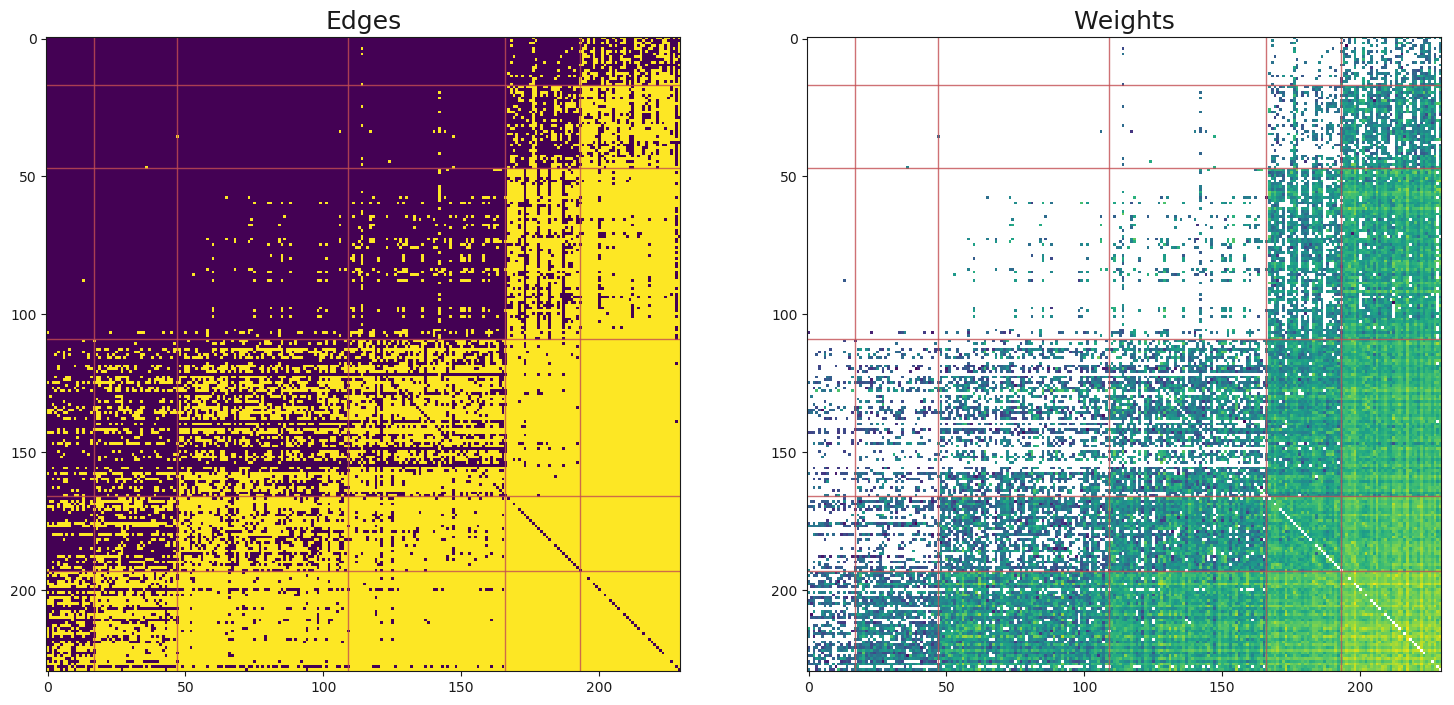

In [67]:
# Sort classes by the average in-weight/import (dim=0)
classes, perm = permute_by_degree(classes, A, 0)
order = classes.argsort()
cs = class_sizes(classes)
fig, axs = plt.subplots(1,2, figsize=(18,18))
axs[0].set_title('Edges', size=18)
axs[1].set_title('Weights', size=18)
axs[0].imshow(A_edges[order,:][:,order].numpy(), cmap='viridis')
acc = -1
for i in cs[:-1]:
    acc += i
    axs[0].axvline(acc, color='r', linestyle='-', linewidth=1, alpha=0.8)
    axs[0].axhline(acc, color='r', linestyle='-', linewidth=1, alpha=0.8)
axs[1].imshow(A.log()[order,:][:,order].numpy(), cmap='viridis')
acc = -1
for i in cs[:-1]:
    acc += i
    axs[1].axvline(acc, color='r', linestyle='-', linewidth=1, alpha=0.8)
    axs[1].axhline(acc, color='r', linestyle='-', linewidth=1, alpha=0.8)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.188, 0.02, 0.615])
fig.colorbar(ax, cax=cbar_ax, aspect=30)
#plt.savefig('../examples/images/wt_A_wsbm.pdf')
plt.show()


In [24]:
print('Total #countries:', len(countries_id))
for i in classes.unique().sort().values:
    g = countries_id[classes==i]
    #g.sort()
    print('Class %d (%d countries):' % (i, len(g)))
    print(g)

Total #countries: 230
Class 0 (18 countries):
['ata' 'atf' 'bvt' 'cck' 'cxr' 'esh' 'hmd' 'iot' 'mnp' 'msr' 'nfk' 'niu'
 'pcn' 'plw' 'sgs' 'spm' 'tuv' 'wlf']
Class 1 (30 countries):
['aia' 'asm' 'btn' 'cok' 'com' 'eri' 'flk' 'fsm' 'gnb' 'grd' 'grl' 'gum'
 'kir' 'kna' 'lca' 'lso' 'myt' 'nru' 'shn' 'slb' 'som' 'stp' 'tca' 'tkl'
 'tls' 'ton' 'umi' 'vat' 'vut' 'wsm']
Class 2 (62 countries):
['abw' 'afg' 'ago' 'and' 'ant' 'atg' 'bdi' 'ben' 'bfa' 'bhs' 'blz' 'bmu'
 'brb' 'brn' 'bwa' 'caf' 'cod' 'cog' 'cpv' 'cub' 'cym' 'dji' 'dma' 'fro'
 'gab' 'gib' 'gin' 'gmb' 'gnq' 'guy' 'hnd' 'hti' 'irq' 'lao' 'lbr' 'lby'
 'mdv' 'mhl' 'mkd' 'mli' 'mng' 'mrt' 'nam' 'ner' 'png' 'prk' 'pse' 'rwa'
 'sdn' 'sle' 'smr' 'sur' 'swz' 'syc' 'tcd' 'tgo' 'tjk' 'tkm' 'uzb' 'vct'
 'vgb' 'yem']
Class 3 (57 countries):
['alb' 'arm' 'aze' 'bgd' 'bhr' 'bih' 'blr' 'bol' 'civ' 'cmr' 'cri' 'cyp'
 'dom' 'dza' 'ecu' 'eth' 'fji' 'geo' 'gha' 'gtm' 'isl' 'jam' 'jor' 'kaz'
 'ken' 'kgz' 'khm' 'kwt' 'lbn' 'mac' 'mda' 'mdg' 'mlt' 'mmr' '

Now, we plot the obtained class assignments on the worlds map with `folium` (black is for unavailable data).

In [48]:
import folium
world_json_path = '../data/World trade/world-countries.json'
countries_id = np.array(df.columns)
for c in range(len(countries_id)):
    countries_id[c] = countries_id[c].upper()
df_map = pd.DataFrame({'code':countries_id, 'val':classes.numpy()})
m = folium.Map(location=[0,0], zoom_start=2)

folium.Choropleth(
    geo_data=world_json_path,
    name='choropleth',
    data=df_map,
    columns=['code', 'val'],
    key_on='feature.id',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Classes',
    #bins=[0.,1.,2.,3.,4.,5.]
    bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5]
).add_to(m)

folium.LayerControl().add_to(m)

m

Again, we examine the distributions of $\theta$ and $B$.

In [74]:
nonempty_classes = q_eta.detach().argmax(dim=0).unique()[perm]
num_ne = len(nonempty_classes)

In [75]:
q_theta_nonempty = q_theta.detach()[nonempty_classes]
num_samples = 1000
theta_samples = Dirichlet(q_theta_nonempty).sample([num_samples])

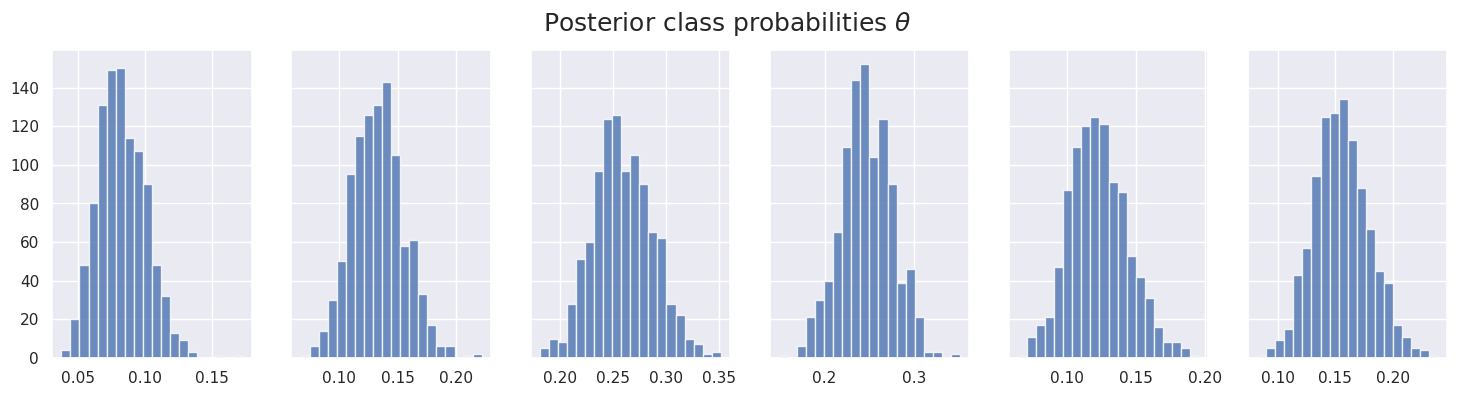

In [76]:
sns.set()
fig, axs = plt.subplots(1, num_ne, figsize=(18, 4), sharey=True)
bins, alpha = 20, 0.8
for i in range(num_ne):
    axs[i].hist(theta_samples[:,i], bins=bins, alpha=alpha) 
fig.suptitle(r'Posterior class probabilities $\theta$', fontsize=18)
#plt.savefig('../examples/images/wt_thetas_wsbm.pdf')
plt.show()

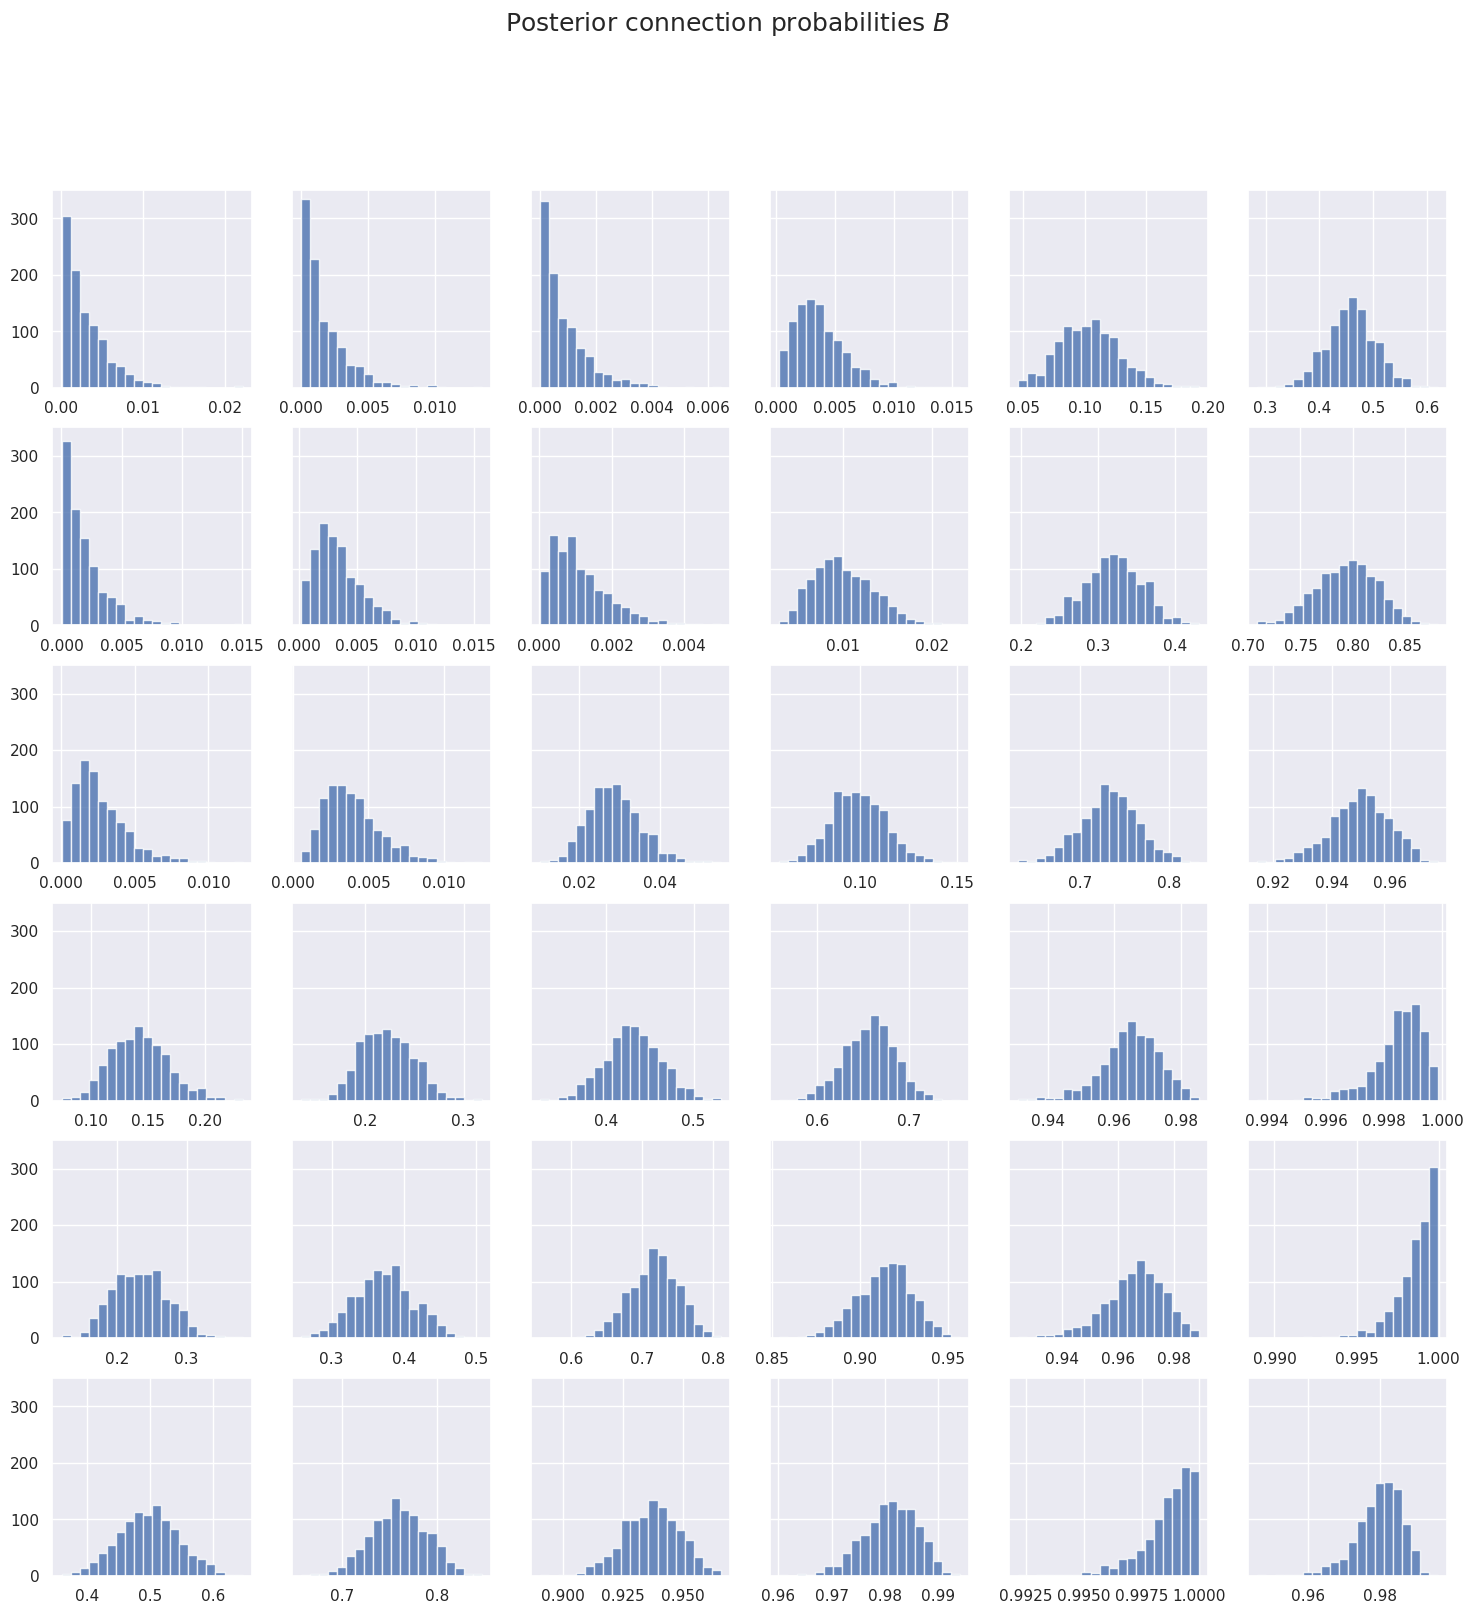

In [77]:
q_B_nonempty = q_B.detach()[nonempty_classes,:,:][:,nonempty_classes,:]
B_samples = Beta(q_B_nonempty[:,:,0], q_B_nonempty[:,:,1]).sample([num_samples])

fig, axs = plt.subplots(num_ne, num_ne, figsize=(18,18), sharey=True)
bins, alpha = 20, 0.8
for i in range(num_ne):
    for j in range(num_ne):
        axs[i,j].hist(B_samples[:,i, j], bins=bins, alpha=alpha) 
fig.suptitle(r'Posterior connection probabilities $B$', fontsize=18)
#plt.savefig('../examples/images/wt_B_wsbm.pdf')
plt.show()

Next, we look at the weight distributions. We sample weights from the estimated means of $q(w_{\mu})$ and $q(w_{\tau})$ and plot them together with the real weights of edges between the obtained classes. Here, we also show the log weights for visual clarity.

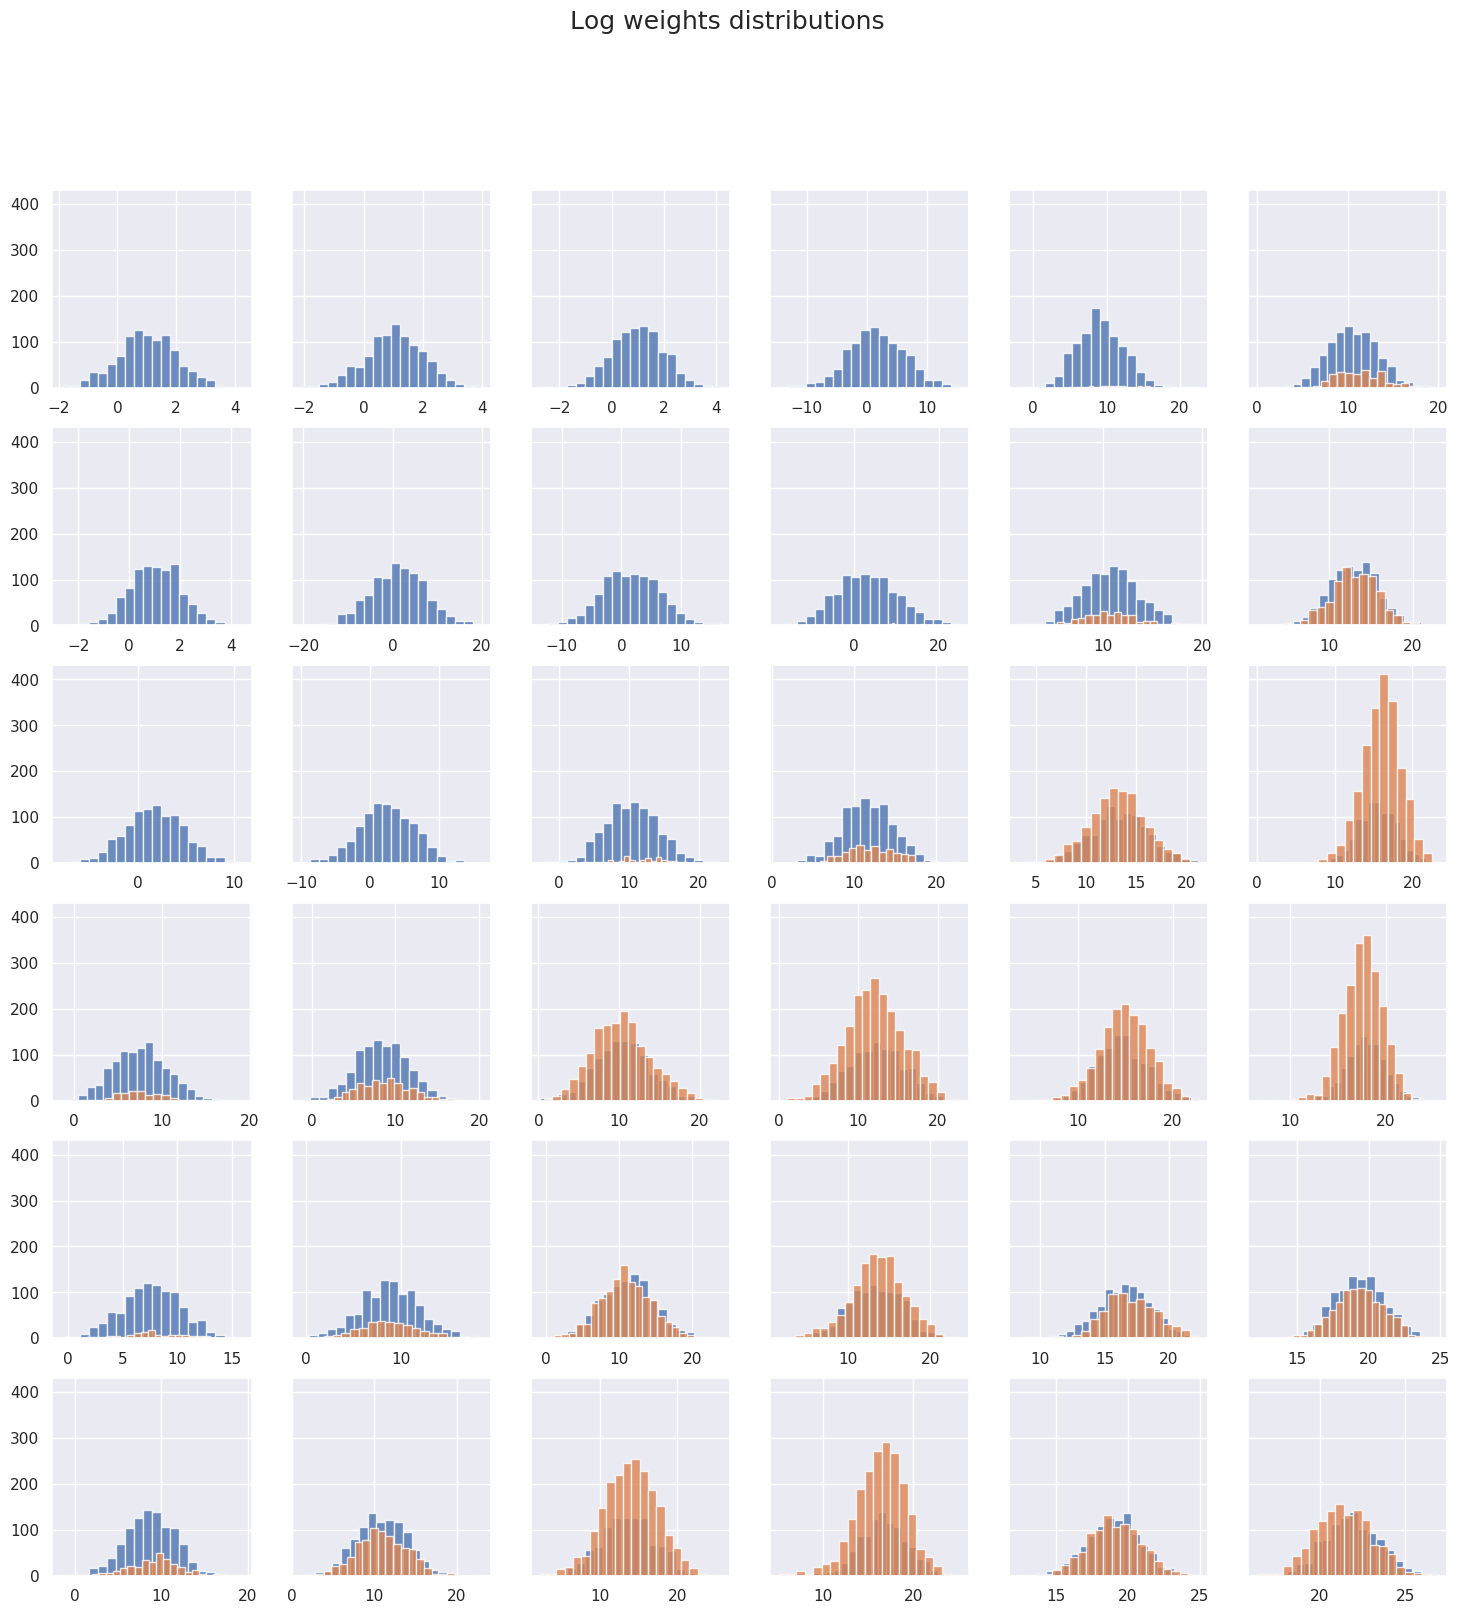

In [78]:
_,_,_, q_w_mu_mean, q_w_tau_mean = vi.qmean()    # Get the parameter means

from torch.distributions.log_normal import LogNormal
q_w_mu_mean_perm = q_w_mu_mean.detach()[nonempty_classes,:][:,nonempty_classes]
q_w_tau_mean_perm = q_w_tau_mean.detach()[nonempty_classes,:][:,nonempty_classes]
q_w_samples = LogNormal(q_w_mu_mean_perm, 1/q_w_tau_mean_perm.sqrt()).sample([num_samples]).log()
fig, axs = plt.subplots(num_ne, num_ne, figsize=(18,18), sharey=True)

bins, alpha = 20, 0.8
for i in range(num_ne):
    for j in range(num_ne):
        axs[i,j].hist(q_w_samples[:,i, j], bins=bins, alpha=alpha)
        A_ = A[classes==i,:][:,classes==j]
        x = A_[A_>0].flatten().log()
        if x.sum()>0:
            axs[i,j].hist(x, bins=bins, alpha=alpha)         
fig.suptitle(r'Log weights distributions', fontsize=18)
#plt.savefig('../examples/images/wt_w_wsbm.pdf')
plt.show()

The approximated and observed distributions looks similar. However, we use [Q-Q plots](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) to check how close the data's distribution to the assumed Log-Normal distribution.

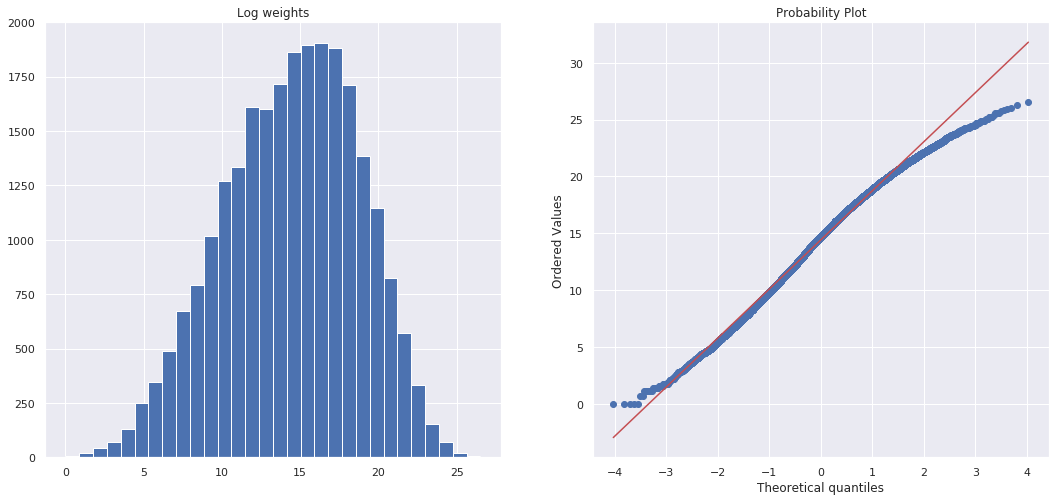

In [11]:
import scipy.stats as stats
sns.set()
fig, axs = plt.subplots(1,2, figsize=(18,8))
axs[0].hist((A[A>0]).flatten().log(), bins=30)
axs[0].set_title('Log weights', size=12)
stats.probplot(A[A>0].flatten().log(), dist="norm", plot=axs[1])
plt.savefig('../examples/images/wt_probplot_1class.pdf')
plt.show()

We see that both tails of the weight distribution differ from the Log-Normal if we consider that all nodes belong only to one class. Next, we investigate it for the WSBM's class assingnment.

 /home/mo/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning:invalid value encountered in double_scalars 
 /home/mo/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning:invalid value encountered in sqrt 
 /home/mo/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning:invalid value encountered in double_scalars 


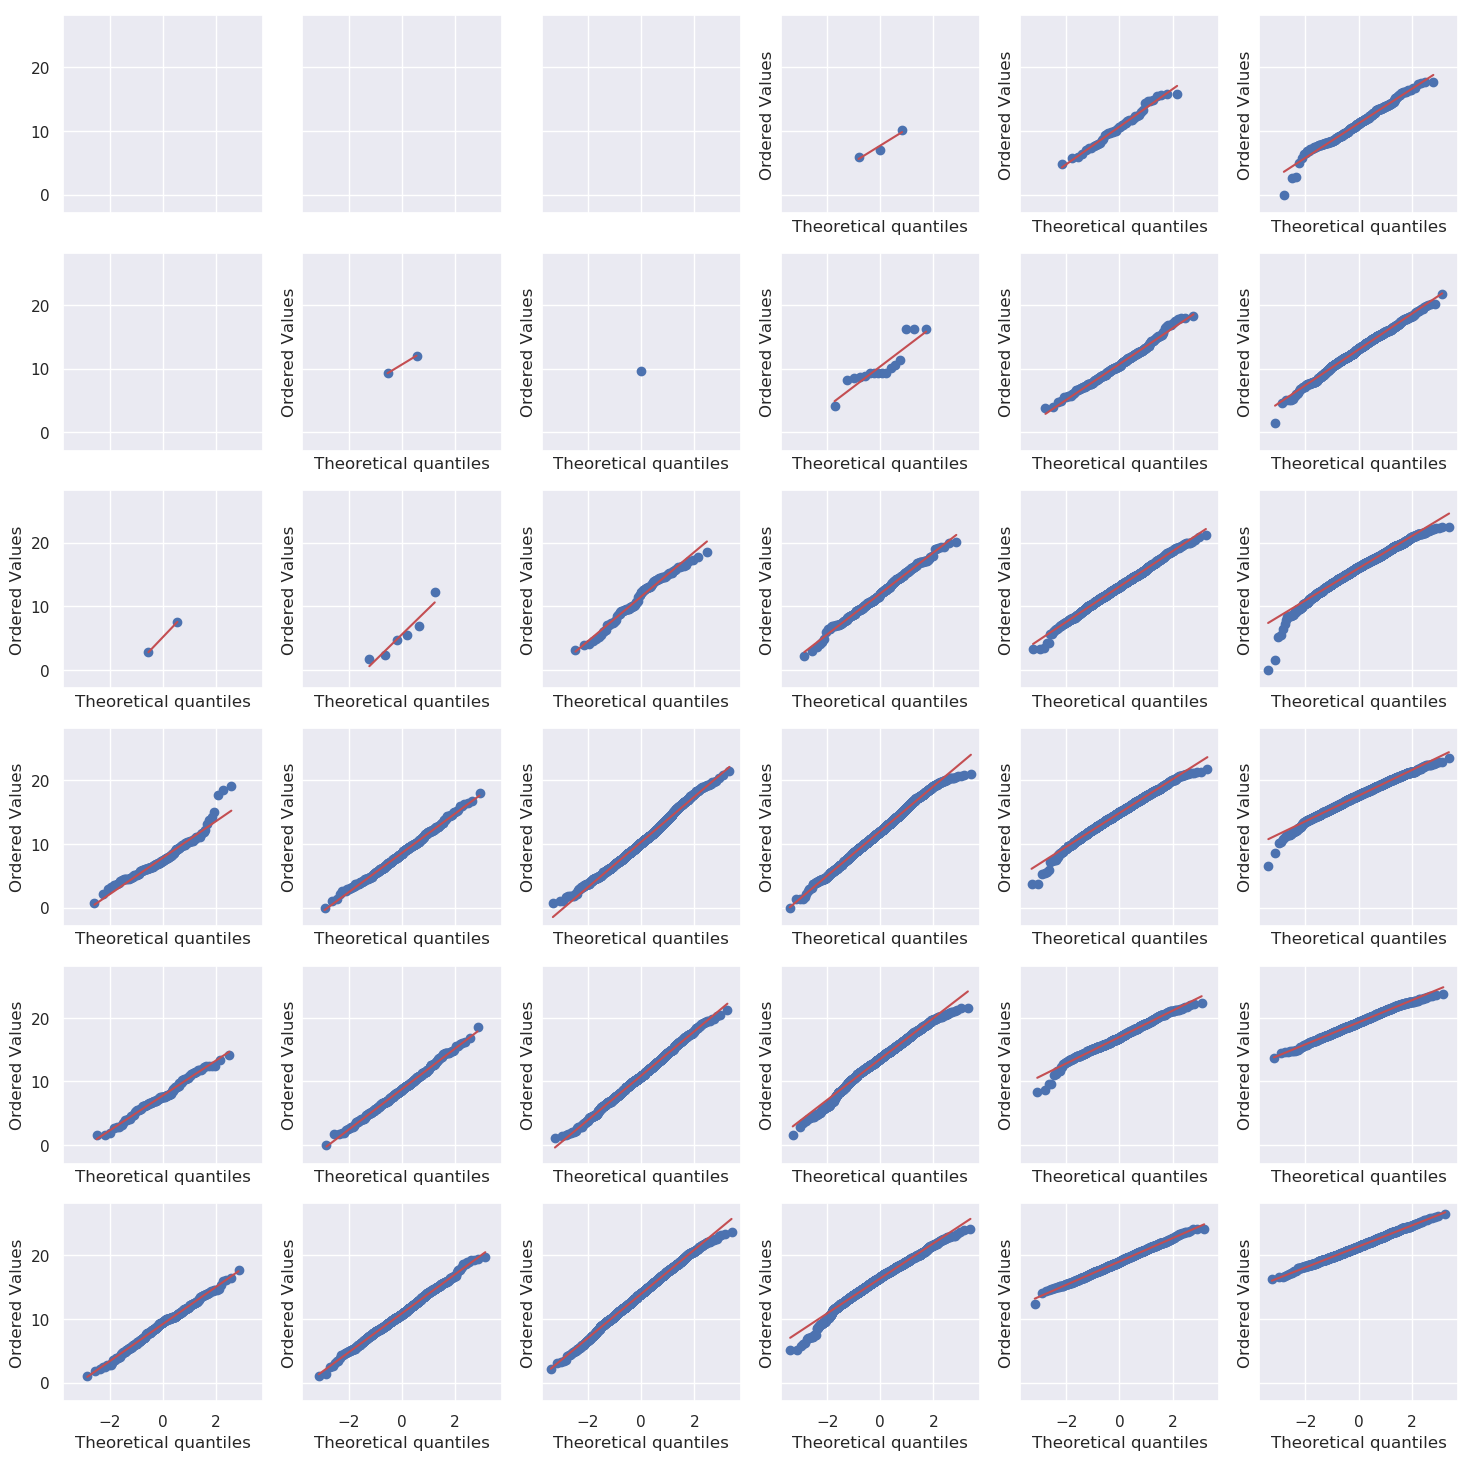

In [83]:
fig, axs = plt.subplots(num_ne, num_ne, figsize=(18,18), sharey=True, sharex=True)
for i in range(num_ne):
    for j in range(num_ne):
        A_ = A[classes==i,:][:,classes==j]
        #axs[i,j] = fig.add_subplot(num_ne, num_ne, 1+i*num_ne+j)
        x = A_[A_>0].flatten().log()
        if x.sum()>0:
            stats.probplot(x, dist="norm", plot=axs[i,j])
            axs[i,j].set_title('')
#plt.savefig('../examples/images/wt_probplot_wsbm.pdf')
plt.show()

This collection of distributions is not ideal but it looks better then just one.

## WDCSBM

We assume that the standard SBM divides nodes into groups mostly based on their in- and out-degree. Now, let us add degree-correction to other possible patterns. As befor we initialize $\delta$ with the observed degree distributions.

In [84]:
delta_init = torch.ones([N,2])
delta_mu = A_edges.sum(dim=1)/A_edges.sum(dim=1).mean()
delta_init[:,0]=delta_mu.log().clone()
print('Contains infinities:', bool(torch.isinf(delta_init).sum().item()))

Contains infinities: False


In [85]:
dataloader = DataLoader(EdgesDataset(A), batch_size=N*4, shuffle=True, num_workers=0)

vi = VI_WDCSBM(num_nodes=N, num_classes=num_classes,
                   init_values={'etas':None, 
                              'thetas':None, 
                              'Bs':None, 
                              'deltas':delta_init,
                              'mus':None,
                              'taus':None})
vi.multi_train(dataloader, epochs=30, lrs = [0.1, 0.05, 0.01], trials=50)

>>>>>>> Training iteration #1 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 1987302.38 | Epoch time 2.20
Epoch 2 | LR: 0.10 | Total loss: 669762.06 | Epoch time 2.49
Epoch 3 | LR: 0.10 | Total loss: 539261.62 | Epoch time 2.35
Epoch 4 | LR: 0.10 | Total loss: 507015.56 | Epoch time 2.61
Epoch 5 | LR: 0.10 | Total loss: 493522.91 | Epoch time 2.48
Epoch 6 | LR: 0.10 | Total loss: 485889.44 | Epoch time 2.28
Epoch 7 | LR: 0.10 | Total loss: 479897.38 | Epoch time 2.35
Epoch 8 | LR: 0.10 | Total loss: 474418.50 | Epoch time 2.23
Epoch 9 | LR: 0.10 | Total loss: 469261.53 | Epoch time 2.32
Epoch 10 | LR: 0.10 | Total loss: 464555.78 | Epoch time 2.31
Epoch 11 | LR: 0.10 | Total loss: 460517.03 | Epoch time 2.19
Epoch 12 | LR: 0.10 | Total loss: 457238.66 | Epoch time 2.23
Epoch 13 | LR: 0.10 | Total loss: 454660.97 | Epoch time 2.31
Epoch 14 | LR: 0.10 | Total loss: 452660.00 | Epoch time 2.29
Epoch 15 | LR: 0.10 | Total loss: 451055.84 | Epoch time 2.19
Epoch 16 | LR: 

Epoch 41 | LR: 0.05 | Total loss: 446613.84 | Epoch time 2.54
Epoch 42 | LR: 0.05 | Total loss: 446532.75 | Epoch time 2.27
Epoch 43 | LR: 0.05 | Total loss: 446460.81 | Epoch time 2.35
Epoch 44 | LR: 0.05 | Total loss: 446358.72 | Epoch time 2.29
Epoch 45 | LR: 0.05 | Total loss: 446274.88 | Epoch time 2.35
Epoch 46 | LR: 0.05 | Total loss: 446183.75 | Epoch time 2.09
Epoch 47 | LR: 0.05 | Total loss: 446119.09 | Epoch time 2.17
Epoch 48 | LR: 0.05 | Total loss: 446030.41 | Epoch time 2.37
Epoch 49 | LR: 0.05 | Total loss: 445967.84 | Epoch time 2.38
Epoch 50 | LR: 0.05 | Total loss: 445916.97 | Epoch time 2.40
Epoch 51 | LR: 0.05 | Total loss: 445843.06 | Epoch time 2.10
Epoch 52 | LR: 0.05 | Total loss: 445767.06 | Epoch time 2.18
Epoch 53 | LR: 0.05 | Total loss: 445688.94 | Epoch time 2.10
Epoch 54 | LR: 0.05 | Total loss: 445599.47 | Epoch time 3.03
Epoch 55 | LR: 0.05 | Total loss: 445540.22 | Epoch time 2.76
Epoch 56 | LR: 0.05 | Total loss: 445465.91 | Epoch time 2.49
Epoch 57

Epoch 82 | LR: 0.01 | Total loss: 440754.56 | Epoch time 2.46
Epoch 83 | LR: 0.01 | Total loss: 440754.56 | Epoch time 2.26
Epoch 84 | LR: 0.01 | Total loss: 440748.56 | Epoch time 2.21
Epoch 85 | LR: 0.01 | Total loss: 440748.34 | Epoch time 2.20
Epoch 86 | LR: 0.01 | Total loss: 440747.94 | Epoch time 2.22
Epoch 87 | LR: 0.01 | Total loss: 440731.38 | Epoch time 2.21
Epoch 88 | LR: 0.01 | Total loss: 440738.59 | Epoch time 2.28
Epoch 89 | LR: 0.01 | Total loss: 440726.16 | Epoch time 2.37
Epoch 90 | LR: 0.01 | Total loss: 440726.06 | Epoch time 2.39
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #4 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 2007143.25 | Epoch time 2.40
Epoch 2 | LR: 0.10 | Total loss: 678018.44 | Epoch time 2.31
Epoch 3 | LR: 0.10 | Total loss: 537405.25 | Epoch time 2.22
Epoch 4 | LR: 0.10 | Total loss: 506124.69 | Epoch time 2.24
Epoch 5 | LR: 0.10 | Total loss: 494141.50 | Epoch time 2.23
Epoch 6 | LR: 0.10 | Total loss: 4875

Epoch 32 | LR: 0.05 | Total loss: 442961.81 | Epoch time 4.09
Epoch 33 | LR: 0.05 | Total loss: 442916.88 | Epoch time 3.39
Epoch 34 | LR: 0.05 | Total loss: 442877.81 | Epoch time 3.57
Epoch 35 | LR: 0.05 | Total loss: 442828.75 | Epoch time 3.43
Epoch 36 | LR: 0.05 | Total loss: 442799.03 | Epoch time 3.50
Epoch 37 | LR: 0.05 | Total loss: 442761.06 | Epoch time 3.58
Epoch 38 | LR: 0.05 | Total loss: 442728.62 | Epoch time 3.62
Epoch 39 | LR: 0.05 | Total loss: 442701.78 | Epoch time 3.15
Epoch 40 | LR: 0.05 | Total loss: 442673.22 | Epoch time 3.48
Epoch 41 | LR: 0.05 | Total loss: 442637.34 | Epoch time 3.77
Epoch 42 | LR: 0.05 | Total loss: 442612.44 | Epoch time 3.81
Epoch 43 | LR: 0.05 | Total loss: 442589.09 | Epoch time 3.67
Epoch 44 | LR: 0.05 | Total loss: 442566.78 | Epoch time 3.37
Epoch 45 | LR: 0.05 | Total loss: 442546.47 | Epoch time 3.23
Epoch 46 | LR: 0.05 | Total loss: 442530.31 | Epoch time 3.51
Epoch 47 | LR: 0.05 | Total loss: 442493.59 | Epoch time 3.78
Epoch 48

Epoch 73 | LR: 0.01 | Total loss: 442330.44 | Epoch time 3.28
Epoch 74 | LR: 0.01 | Total loss: 442325.19 | Epoch time 3.30
Epoch 75 | LR: 0.01 | Total loss: 442301.91 | Epoch time 3.80
Epoch 76 | LR: 0.01 | Total loss: 442300.44 | Epoch time 3.48
Epoch 77 | LR: 0.01 | Total loss: 442309.00 | Epoch time 3.34
Epoch 78 | LR: 0.01 | Total loss: 442288.78 | Epoch time 4.08
Epoch 79 | LR: 0.01 | Total loss: 442275.34 | Epoch time 3.81
Epoch 80 | LR: 0.01 | Total loss: 442258.75 | Epoch time 5.10
Epoch 81 | LR: 0.01 | Total loss: 442256.91 | Epoch time 3.02
Epoch 82 | LR: 0.01 | Total loss: 442248.44 | Epoch time 3.01
Epoch 83 | LR: 0.01 | Total loss: 442232.41 | Epoch time 3.27
Epoch 84 | LR: 0.01 | Total loss: 442207.88 | Epoch time 2.88
Epoch 85 | LR: 0.01 | Total loss: 442207.69 | Epoch time 2.54
Epoch 86 | LR: 0.01 | Total loss: 442211.22 | Epoch time 3.03
Epoch 87 | LR: 0.01 | Total loss: 442185.34 | Epoch time 3.13
Epoch 88 | LR: 0.01 | Total loss: 442182.06 | Epoch time 4.61
Epoch 89

Epoch 23 | LR: 0.10 | Total loss: 444376.62 | Epoch time 3.92
Epoch 24 | LR: 0.10 | Total loss: 444081.59 | Epoch time 2.30
Epoch 25 | LR: 0.10 | Total loss: 443846.03 | Epoch time 2.58
Epoch 26 | LR: 0.10 | Total loss: 443647.97 | Epoch time 2.16
Epoch 27 | LR: 0.10 | Total loss: 443474.72 | Epoch time 2.19
Epoch 28 | LR: 0.10 | Total loss: 443360.91 | Epoch time 2.51
Epoch 29 | LR: 0.10 | Total loss: 443226.50 | Epoch time 2.54
Epoch 30 | LR: 0.10 | Total loss: 443127.97 | Epoch time 2.73
Epoch 31 | LR: 0.05 | Total loss: 443032.62 | Epoch time 2.41
Epoch 32 | LR: 0.05 | Total loss: 442948.38 | Epoch time 2.55
Epoch 33 | LR: 0.05 | Total loss: 442862.94 | Epoch time 2.60
Epoch 34 | LR: 0.05 | Total loss: 442802.94 | Epoch time 1.93
Epoch 35 | LR: 0.05 | Total loss: 442758.06 | Epoch time 2.19
Epoch 36 | LR: 0.05 | Total loss: 442700.41 | Epoch time 2.38
Epoch 37 | LR: 0.05 | Total loss: 442633.81 | Epoch time 3.10
Epoch 38 | LR: 0.05 | Total loss: 442602.12 | Epoch time 3.63
Epoch 39

Epoch 64 | LR: 0.01 | Total loss: 442511.19 | Epoch time 3.47
Epoch 65 | LR: 0.01 | Total loss: 442500.47 | Epoch time 2.69
Epoch 66 | LR: 0.01 | Total loss: 442483.75 | Epoch time 2.68
Epoch 67 | LR: 0.01 | Total loss: 442477.41 | Epoch time 3.00
Epoch 68 | LR: 0.01 | Total loss: 442443.84 | Epoch time 3.15
Epoch 69 | LR: 0.01 | Total loss: 442437.09 | Epoch time 2.48
Epoch 70 | LR: 0.01 | Total loss: 442438.69 | Epoch time 2.46
Epoch 71 | LR: 0.01 | Total loss: 442413.53 | Epoch time 2.82
Epoch 72 | LR: 0.01 | Total loss: 442396.19 | Epoch time 2.32
Epoch 73 | LR: 0.01 | Total loss: 442382.03 | Epoch time 2.32
Epoch 74 | LR: 0.01 | Total loss: 442373.22 | Epoch time 2.49
Epoch 75 | LR: 0.01 | Total loss: 442342.78 | Epoch time 2.06
Epoch 76 | LR: 0.01 | Total loss: 442320.00 | Epoch time 2.18
Epoch 77 | LR: 0.01 | Total loss: 442295.31 | Epoch time 2.30
Epoch 78 | LR: 0.01 | Total loss: 442280.84 | Epoch time 2.38
Epoch 79 | LR: 0.01 | Total loss: 442256.88 | Epoch time 2.34
Epoch 80

Epoch 14 | LR: 0.10 | Total loss: 453276.50 | Epoch time 4.99
Epoch 15 | LR: 0.10 | Total loss: 451876.66 | Epoch time 5.32
Epoch 16 | LR: 0.10 | Total loss: 450687.69 | Epoch time 5.50
Epoch 17 | LR: 0.10 | Total loss: 449706.22 | Epoch time 4.54
Epoch 18 | LR: 0.10 | Total loss: 448865.59 | Epoch time 5.45
Epoch 19 | LR: 0.10 | Total loss: 448164.81 | Epoch time 4.81
Epoch 20 | LR: 0.10 | Total loss: 447566.38 | Epoch time 4.55
Epoch 21 | LR: 0.10 | Total loss: 447090.62 | Epoch time 4.40
Epoch 22 | LR: 0.10 | Total loss: 446692.66 | Epoch time 4.79
Epoch 23 | LR: 0.10 | Total loss: 446367.53 | Epoch time 4.52
Epoch 24 | LR: 0.10 | Total loss: 446100.94 | Epoch time 4.42
Epoch 25 | LR: 0.10 | Total loss: 445852.38 | Epoch time 4.99
Epoch 26 | LR: 0.10 | Total loss: 445663.91 | Epoch time 4.89
Epoch 27 | LR: 0.10 | Total loss: 445484.28 | Epoch time 4.80
Epoch 28 | LR: 0.10 | Total loss: 445369.75 | Epoch time 4.63
Epoch 29 | LR: 0.10 | Total loss: 445245.09 | Epoch time 4.80
Epoch 30

Epoch 55 | LR: 0.05 | Total loss: 442633.59 | Epoch time 2.69
Epoch 56 | LR: 0.05 | Total loss: 442614.94 | Epoch time 2.84
Epoch 57 | LR: 0.05 | Total loss: 442609.91 | Epoch time 3.16
Epoch 58 | LR: 0.05 | Total loss: 442600.88 | Epoch time 2.27
Epoch 59 | LR: 0.05 | Total loss: 442592.22 | Epoch time 2.26
Epoch 60 | LR: 0.05 | Total loss: 442587.59 | Epoch time 1.93
Epoch 61 | LR: 0.01 | Total loss: 442562.88 | Epoch time 2.05
Epoch 62 | LR: 0.01 | Total loss: 442564.25 | Epoch time 2.09
Epoch 63 | LR: 0.01 | Total loss: 442547.34 | Epoch time 2.08
Epoch 64 | LR: 0.01 | Total loss: 442552.44 | Epoch time 2.14
Epoch 65 | LR: 0.01 | Total loss: 442535.56 | Epoch time 2.18
Epoch 66 | LR: 0.01 | Total loss: 442539.69 | Epoch time 2.23
Epoch 67 | LR: 0.01 | Total loss: 442526.38 | Epoch time 2.14
Epoch 68 | LR: 0.01 | Total loss: 442516.91 | Epoch time 2.09
Epoch 69 | LR: 0.01 | Total loss: 442526.94 | Epoch time 2.12
Epoch 70 | LR: 0.01 | Total loss: 442511.72 | Epoch time 3.47
Epoch 71

Epoch 5 | LR: 0.10 | Total loss: 491855.16 | Epoch time 2.30
Epoch 6 | LR: 0.10 | Total loss: 484495.88 | Epoch time 2.29
Epoch 7 | LR: 0.10 | Total loss: 478598.28 | Epoch time 2.25
Epoch 8 | LR: 0.10 | Total loss: 473183.81 | Epoch time 2.24
Epoch 9 | LR: 0.10 | Total loss: 468173.38 | Epoch time 2.25
Epoch 10 | LR: 0.10 | Total loss: 463700.16 | Epoch time 2.31
Epoch 11 | LR: 0.10 | Total loss: 459891.38 | Epoch time 2.31
Epoch 12 | LR: 0.10 | Total loss: 456751.97 | Epoch time 2.35
Epoch 13 | LR: 0.10 | Total loss: 454254.09 | Epoch time 2.31
Epoch 14 | LR: 0.10 | Total loss: 452353.88 | Epoch time 2.28
Epoch 15 | LR: 0.10 | Total loss: 450883.97 | Epoch time 2.27
Epoch 16 | LR: 0.10 | Total loss: 449759.38 | Epoch time 2.23
Epoch 17 | LR: 0.10 | Total loss: 448839.19 | Epoch time 2.17
Epoch 18 | LR: 0.10 | Total loss: 448083.09 | Epoch time 2.21
Epoch 19 | LR: 0.10 | Total loss: 447476.16 | Epoch time 2.25
Epoch 20 | LR: 0.10 | Total loss: 446967.44 | Epoch time 2.26
Epoch 21 | LR

Epoch 46 | LR: 0.05 | Total loss: 439872.28 | Epoch time 2.15
Epoch 47 | LR: 0.05 | Total loss: 439833.69 | Epoch time 2.09
Epoch 48 | LR: 0.05 | Total loss: 439833.12 | Epoch time 2.06
Epoch 49 | LR: 0.05 | Total loss: 439820.94 | Epoch time 1.85
Epoch 50 | LR: 0.05 | Total loss: 439802.69 | Epoch time 2.04
Epoch 51 | LR: 0.05 | Total loss: 439786.91 | Epoch time 2.07
Epoch 52 | LR: 0.05 | Total loss: 439761.56 | Epoch time 1.98
Epoch 53 | LR: 0.05 | Total loss: 439770.72 | Epoch time 1.99
Epoch 54 | LR: 0.05 | Total loss: 439757.25 | Epoch time 1.84
Epoch 55 | LR: 0.05 | Total loss: 439717.72 | Epoch time 1.83
Epoch 56 | LR: 0.05 | Total loss: 439731.66 | Epoch time 1.83
Epoch 57 | LR: 0.05 | Total loss: 439711.12 | Epoch time 1.84
Epoch 58 | LR: 0.05 | Total loss: 439695.75 | Epoch time 1.85
Epoch 59 | LR: 0.05 | Total loss: 439693.34 | Epoch time 1.81
Epoch 60 | LR: 0.05 | Total loss: 439687.06 | Epoch time 1.81
Epoch 61 | LR: 0.01 | Total loss: 439656.41 | Epoch time 1.84
Epoch 62

Epoch 87 | LR: 0.01 | Total loss: 440204.12 | Epoch time 2.02
Epoch 88 | LR: 0.01 | Total loss: 440198.72 | Epoch time 2.03
Epoch 89 | LR: 0.01 | Total loss: 440182.53 | Epoch time 2.01
Epoch 90 | LR: 0.01 | Total loss: 440194.88 | Epoch time 2.02
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #17 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 1877997.00 | Epoch time 2.08
Epoch 2 | LR: 0.10 | Total loss: 643709.81 | Epoch time 2.40
Epoch 3 | LR: 0.10 | Total loss: 525787.12 | Epoch time 2.37
Epoch 4 | LR: 0.10 | Total loss: 498360.97 | Epoch time 2.28
Epoch 5 | LR: 0.10 | Total loss: 487765.72 | Epoch time 2.19
Epoch 6 | LR: 0.10 | Total loss: 481129.53 | Epoch time 2.28
Epoch 7 | LR: 0.10 | Total loss: 475655.31 | Epoch time 2.43
Epoch 8 | LR: 0.10 | Total loss: 470735.19 | Epoch time 2.16
Epoch 9 | LR: 0.10 | Total loss: 466228.97 | Epoch time 2.22
Epoch 10 | LR: 0.10 | Total loss: 462092.53 | Epoch time 2.13
Epoch 11 | LR: 0.10 | Total loss: 458361

Epoch 37 | LR: 0.05 | Total loss: 441764.34 | Epoch time 2.18
Epoch 38 | LR: 0.05 | Total loss: 441696.59 | Epoch time 2.34
Epoch 39 | LR: 0.05 | Total loss: 441598.94 | Epoch time 2.26
Epoch 40 | LR: 0.05 | Total loss: 441513.91 | Epoch time 2.23
Epoch 41 | LR: 0.05 | Total loss: 441437.88 | Epoch time 2.19
Epoch 42 | LR: 0.05 | Total loss: 441348.97 | Epoch time 2.15
Epoch 43 | LR: 0.05 | Total loss: 441250.22 | Epoch time 2.19
Epoch 44 | LR: 0.05 | Total loss: 441195.84 | Epoch time 2.14
Epoch 45 | LR: 0.05 | Total loss: 441135.47 | Epoch time 2.31
Epoch 46 | LR: 0.05 | Total loss: 441075.50 | Epoch time 2.30
Epoch 47 | LR: 0.05 | Total loss: 441045.38 | Epoch time 2.25
Epoch 48 | LR: 0.05 | Total loss: 440994.28 | Epoch time 2.27
Epoch 49 | LR: 0.05 | Total loss: 440990.78 | Epoch time 2.24
Epoch 50 | LR: 0.05 | Total loss: 440920.84 | Epoch time 2.41
Epoch 51 | LR: 0.05 | Total loss: 440915.62 | Epoch time 2.21
Epoch 52 | LR: 0.05 | Total loss: 440862.66 | Epoch time 1.98
Epoch 53

Epoch 78 | LR: 0.01 | Total loss: 441953.88 | Epoch time 2.15
Epoch 79 | LR: 0.01 | Total loss: 441950.88 | Epoch time 1.91
Epoch 80 | LR: 0.01 | Total loss: 441930.06 | Epoch time 2.18
Epoch 81 | LR: 0.01 | Total loss: 441914.56 | Epoch time 2.09
Epoch 82 | LR: 0.01 | Total loss: 441897.94 | Epoch time 1.86
Epoch 83 | LR: 0.01 | Total loss: 441882.25 | Epoch time 2.25
Epoch 84 | LR: 0.01 | Total loss: 441862.56 | Epoch time 1.99
Epoch 85 | LR: 0.01 | Total loss: 441838.34 | Epoch time 1.82
Epoch 86 | LR: 0.01 | Total loss: 441821.81 | Epoch time 1.84
Epoch 87 | LR: 0.01 | Total loss: 441810.66 | Epoch time 1.87
Epoch 88 | LR: 0.01 | Total loss: 441772.53 | Epoch time 1.82
Epoch 89 | LR: 0.01 | Total loss: 441773.38 | Epoch time 1.86
Epoch 90 | LR: 0.01 | Total loss: 441759.56 | Epoch time 1.86
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #20 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 1985161.25 | Epoch time 1.87
Epoch 2 | LR: 0.10 | Total loss:

Epoch 28 | LR: 0.10 | Total loss: 443619.88 | Epoch time 3.33
Epoch 29 | LR: 0.10 | Total loss: 443480.19 | Epoch time 3.25
Epoch 30 | LR: 0.10 | Total loss: 443354.09 | Epoch time 2.95
Epoch 31 | LR: 0.05 | Total loss: 443237.19 | Epoch time 3.10
Epoch 32 | LR: 0.05 | Total loss: 443140.25 | Epoch time 2.86
Epoch 33 | LR: 0.05 | Total loss: 443060.59 | Epoch time 2.56
Epoch 34 | LR: 0.05 | Total loss: 442966.22 | Epoch time 2.54
Epoch 35 | LR: 0.05 | Total loss: 442891.44 | Epoch time 2.37
Epoch 36 | LR: 0.05 | Total loss: 442828.81 | Epoch time 2.10
Epoch 37 | LR: 0.05 | Total loss: 442759.06 | Epoch time 2.04
Epoch 38 | LR: 0.05 | Total loss: 442705.34 | Epoch time 2.03
Epoch 39 | LR: 0.05 | Total loss: 442650.50 | Epoch time 2.55
Epoch 40 | LR: 0.05 | Total loss: 442606.78 | Epoch time 2.66
Epoch 41 | LR: 0.05 | Total loss: 442561.00 | Epoch time 2.31
Epoch 42 | LR: 0.05 | Total loss: 442519.66 | Epoch time 2.65
Epoch 43 | LR: 0.05 | Total loss: 442498.28 | Epoch time 2.55
Epoch 44

Epoch 69 | LR: 0.01 | Total loss: 442196.28 | Epoch time 2.09
Epoch 70 | LR: 0.01 | Total loss: 442182.19 | Epoch time 2.09
Epoch 71 | LR: 0.01 | Total loss: 442166.25 | Epoch time 2.31
Epoch 72 | LR: 0.01 | Total loss: 442165.00 | Epoch time 2.27
Epoch 73 | LR: 0.01 | Total loss: 442154.22 | Epoch time 2.11
Epoch 74 | LR: 0.01 | Total loss: 442159.03 | Epoch time 2.09
Epoch 75 | LR: 0.01 | Total loss: 442136.66 | Epoch time 2.12
Epoch 76 | LR: 0.01 | Total loss: 442115.47 | Epoch time 2.18
Epoch 77 | LR: 0.01 | Total loss: 442102.84 | Epoch time 2.17
Epoch 78 | LR: 0.01 | Total loss: 442079.56 | Epoch time 2.10
Epoch 79 | LR: 0.01 | Total loss: 442081.72 | Epoch time 2.07
Epoch 80 | LR: 0.01 | Total loss: 442073.56 | Epoch time 2.06
Epoch 81 | LR: 0.01 | Total loss: 442049.97 | Epoch time 2.03
Epoch 82 | LR: 0.01 | Total loss: 442043.06 | Epoch time 2.04
Epoch 83 | LR: 0.01 | Total loss: 442013.75 | Epoch time 2.27
Epoch 84 | LR: 0.01 | Total loss: 441989.84 | Epoch time 2.23
Epoch 85

Epoch 19 | LR: 0.10 | Total loss: 446454.50 | Epoch time 2.22
Epoch 20 | LR: 0.10 | Total loss: 445878.00 | Epoch time 2.27
Epoch 21 | LR: 0.10 | Total loss: 445424.34 | Epoch time 2.28
Epoch 22 | LR: 0.10 | Total loss: 445048.53 | Epoch time 2.33
Epoch 23 | LR: 0.10 | Total loss: 444750.91 | Epoch time 2.30
Epoch 24 | LR: 0.10 | Total loss: 444487.94 | Epoch time 2.10
Epoch 25 | LR: 0.10 | Total loss: 444300.94 | Epoch time 2.10
Epoch 26 | LR: 0.10 | Total loss: 444120.44 | Epoch time 2.03
Epoch 27 | LR: 0.10 | Total loss: 443977.16 | Epoch time 2.33
Epoch 28 | LR: 0.10 | Total loss: 443856.56 | Epoch time 2.10
Epoch 29 | LR: 0.10 | Total loss: 443754.50 | Epoch time 2.08
Epoch 30 | LR: 0.10 | Total loss: 443674.00 | Epoch time 2.08
Epoch 31 | LR: 0.05 | Total loss: 443590.09 | Epoch time 2.13
Epoch 32 | LR: 0.05 | Total loss: 443522.28 | Epoch time 2.05
Epoch 33 | LR: 0.05 | Total loss: 443443.56 | Epoch time 2.10
Epoch 34 | LR: 0.05 | Total loss: 443372.62 | Epoch time 2.22
Epoch 35

Epoch 60 | LR: 0.05 | Total loss: 441607.28 | Epoch time 3.61
Epoch 61 | LR: 0.01 | Total loss: 441594.19 | Epoch time 3.01
Epoch 62 | LR: 0.01 | Total loss: 441579.78 | Epoch time 3.77
Epoch 63 | LR: 0.01 | Total loss: 441563.56 | Epoch time 3.09
Epoch 64 | LR: 0.01 | Total loss: 441550.47 | Epoch time 3.82
Epoch 65 | LR: 0.01 | Total loss: 441540.38 | Epoch time 2.91
Epoch 66 | LR: 0.01 | Total loss: 441531.91 | Epoch time 3.65
Epoch 67 | LR: 0.01 | Total loss: 441512.16 | Epoch time 3.78
Epoch 68 | LR: 0.01 | Total loss: 441490.78 | Epoch time 3.21
Epoch 69 | LR: 0.01 | Total loss: 441493.53 | Epoch time 3.77
Epoch 70 | LR: 0.01 | Total loss: 441485.62 | Epoch time 2.82
Epoch 71 | LR: 0.01 | Total loss: 441474.28 | Epoch time 3.76
Epoch 72 | LR: 0.01 | Total loss: 441459.16 | Epoch time 2.33
Epoch 73 | LR: 0.01 | Total loss: 441448.50 | Epoch time 1.93
Epoch 74 | LR: 0.01 | Total loss: 441447.78 | Epoch time 2.52
Epoch 75 | LR: 0.01 | Total loss: 441434.12 | Epoch time 3.96
Epoch 76

Epoch 10 | LR: 0.10 | Total loss: 467007.00 | Epoch time 2.84
Epoch 11 | LR: 0.10 | Total loss: 462262.19 | Epoch time 2.61
Epoch 12 | LR: 0.10 | Total loss: 458251.53 | Epoch time 3.31
Epoch 13 | LR: 0.10 | Total loss: 455032.75 | Epoch time 3.65
Epoch 14 | LR: 0.10 | Total loss: 452509.03 | Epoch time 3.48
Epoch 15 | LR: 0.10 | Total loss: 450492.50 | Epoch time 4.14
Epoch 16 | LR: 0.10 | Total loss: 448887.16 | Epoch time 3.46
Epoch 17 | LR: 0.10 | Total loss: 447577.09 | Epoch time 3.13
Epoch 18 | LR: 0.10 | Total loss: 446535.59 | Epoch time 3.83
Epoch 19 | LR: 0.10 | Total loss: 445696.31 | Epoch time 3.82
Epoch 20 | LR: 0.10 | Total loss: 445052.59 | Epoch time 3.59
Epoch 21 | LR: 0.10 | Total loss: 444562.59 | Epoch time 3.45
Epoch 22 | LR: 0.10 | Total loss: 444156.66 | Epoch time 2.31
Epoch 23 | LR: 0.10 | Total loss: 443867.31 | Epoch time 2.20
Epoch 24 | LR: 0.10 | Total loss: 443628.09 | Epoch time 2.23
Epoch 25 | LR: 0.10 | Total loss: 443450.41 | Epoch time 2.26
Epoch 26

Epoch 51 | LR: 0.05 | Total loss: 442492.78 | Epoch time 2.48
Epoch 52 | LR: 0.05 | Total loss: 442480.28 | Epoch time 2.20
Epoch 53 | LR: 0.05 | Total loss: 442476.94 | Epoch time 1.99
Epoch 54 | LR: 0.05 | Total loss: 442458.62 | Epoch time 1.89
Epoch 55 | LR: 0.05 | Total loss: 442432.12 | Epoch time 2.25
Epoch 56 | LR: 0.05 | Total loss: 442427.09 | Epoch time 2.37
Epoch 57 | LR: 0.05 | Total loss: 442419.12 | Epoch time 2.46
Epoch 58 | LR: 0.05 | Total loss: 442395.06 | Epoch time 2.11
Epoch 59 | LR: 0.05 | Total loss: 442388.72 | Epoch time 2.01
Epoch 60 | LR: 0.05 | Total loss: 442374.12 | Epoch time 1.91
Epoch 61 | LR: 0.01 | Total loss: 442366.50 | Epoch time 2.20
Epoch 62 | LR: 0.01 | Total loss: 442352.28 | Epoch time 3.75
Epoch 63 | LR: 0.01 | Total loss: 442348.88 | Epoch time 3.45
Epoch 64 | LR: 0.01 | Total loss: 442332.47 | Epoch time 3.39
Epoch 65 | LR: 0.01 | Total loss: 442319.53 | Epoch time 3.12
Epoch 66 | LR: 0.01 | Total loss: 442296.22 | Epoch time 3.55
Epoch 67

Epoch 1 | LR: 0.10 | Total loss: 1983385.38 | Epoch time 4.50
Epoch 2 | LR: 0.10 | Total loss: 680142.50 | Epoch time 4.11
Epoch 3 | LR: 0.10 | Total loss: 535573.38 | Epoch time 3.39
Epoch 4 | LR: 0.10 | Total loss: 503321.44 | Epoch time 3.88
Epoch 5 | LR: 0.10 | Total loss: 491276.50 | Epoch time 3.57
Epoch 6 | LR: 0.10 | Total loss: 484414.88 | Epoch time 3.75
Epoch 7 | LR: 0.10 | Total loss: 478940.56 | Epoch time 3.98
Epoch 8 | LR: 0.10 | Total loss: 473996.56 | Epoch time 3.23
Epoch 9 | LR: 0.10 | Total loss: 469427.19 | Epoch time 3.77
Epoch 10 | LR: 0.10 | Total loss: 465356.94 | Epoch time 2.89
Epoch 11 | LR: 0.10 | Total loss: 461860.56 | Epoch time 2.34
Epoch 12 | LR: 0.10 | Total loss: 458930.47 | Epoch time 4.16
Epoch 13 | LR: 0.10 | Total loss: 456481.62 | Epoch time 3.12
Epoch 14 | LR: 0.10 | Total loss: 454458.00 | Epoch time 2.32
Epoch 15 | LR: 0.10 | Total loss: 452822.75 | Epoch time 3.37
Epoch 16 | LR: 0.10 | Total loss: 451485.09 | Epoch time 3.28
Epoch 17 | LR: 0

Epoch 42 | LR: 0.05 | Total loss: 441532.97 | Epoch time 2.24
Epoch 43 | LR: 0.05 | Total loss: 441485.31 | Epoch time 2.07
Epoch 44 | LR: 0.05 | Total loss: 441440.34 | Epoch time 2.36
Epoch 45 | LR: 0.05 | Total loss: 441396.16 | Epoch time 2.38
Epoch 46 | LR: 0.05 | Total loss: 441363.28 | Epoch time 2.41
Epoch 47 | LR: 0.05 | Total loss: 441330.81 | Epoch time 2.65
Epoch 48 | LR: 0.05 | Total loss: 441294.38 | Epoch time 2.67
Epoch 49 | LR: 0.05 | Total loss: 441256.00 | Epoch time 2.39
Epoch 50 | LR: 0.05 | Total loss: 441224.81 | Epoch time 2.61
Epoch 51 | LR: 0.05 | Total loss: 441193.81 | Epoch time 2.94
Epoch 52 | LR: 0.05 | Total loss: 441147.09 | Epoch time 2.35
Epoch 53 | LR: 0.05 | Total loss: 441135.69 | Epoch time 2.02
Epoch 54 | LR: 0.05 | Total loss: 441102.31 | Epoch time 2.28
Epoch 55 | LR: 0.05 | Total loss: 441077.59 | Epoch time 2.67
Epoch 56 | LR: 0.05 | Total loss: 441053.53 | Epoch time 2.21
Epoch 57 | LR: 0.05 | Total loss: 441037.56 | Epoch time 2.15
Epoch 58

Epoch 83 | LR: 0.01 | Total loss: 441210.88 | Epoch time 1.89
Epoch 84 | LR: 0.01 | Total loss: 441189.75 | Epoch time 1.95
Epoch 85 | LR: 0.01 | Total loss: 441176.84 | Epoch time 1.86
Epoch 86 | LR: 0.01 | Total loss: 441159.66 | Epoch time 2.02
Epoch 87 | LR: 0.01 | Total loss: 441147.28 | Epoch time 2.17
Epoch 88 | LR: 0.01 | Total loss: 441112.03 | Epoch time 2.17
Epoch 89 | LR: 0.01 | Total loss: 441098.00 | Epoch time 1.86
Epoch 90 | LR: 0.01 | Total loss: 441062.62 | Epoch time 1.97
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #33 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 1885877.62 | Epoch time 1.87
Epoch 2 | LR: 0.10 | Total loss: 655391.19 | Epoch time 1.95
Epoch 3 | LR: 0.10 | Total loss: 531199.75 | Epoch time 2.13
Epoch 4 | LR: 0.10 | Total loss: 502531.16 | Epoch time 2.12
Epoch 5 | LR: 0.10 | Total loss: 490936.31 | Epoch time 2.16
Epoch 6 | LR: 0.10 | Total loss: 484063.62 | Epoch time 2.11
Epoch 7 | LR: 0.10 | Total loss: 4784

Epoch 33 | LR: 0.05 | Total loss: 441952.41 | Epoch time 3.51
Epoch 34 | LR: 0.05 | Total loss: 441926.44 | Epoch time 3.72
Epoch 35 | LR: 0.05 | Total loss: 441882.16 | Epoch time 3.51
Epoch 36 | LR: 0.05 | Total loss: 441850.41 | Epoch time 3.41
Epoch 37 | LR: 0.05 | Total loss: 441817.69 | Epoch time 3.44
Epoch 38 | LR: 0.05 | Total loss: 441785.06 | Epoch time 3.25
Epoch 39 | LR: 0.05 | Total loss: 441755.00 | Epoch time 3.30
Epoch 40 | LR: 0.05 | Total loss: 441735.28 | Epoch time 3.59
Epoch 41 | LR: 0.05 | Total loss: 441697.31 | Epoch time 3.44
Epoch 42 | LR: 0.05 | Total loss: 441670.59 | Epoch time 3.31
Epoch 43 | LR: 0.05 | Total loss: 441641.28 | Epoch time 3.29
Epoch 44 | LR: 0.05 | Total loss: 441619.38 | Epoch time 3.61
Epoch 45 | LR: 0.05 | Total loss: 441592.94 | Epoch time 3.30
Epoch 46 | LR: 0.05 | Total loss: 441548.12 | Epoch time 3.34
Epoch 47 | LR: 0.05 | Total loss: 441525.06 | Epoch time 3.63
Epoch 48 | LR: 0.05 | Total loss: 441499.62 | Epoch time 3.44
Epoch 49

Epoch 74 | LR: 0.01 | Total loss: 439477.12 | Epoch time 1.85
Epoch 75 | LR: 0.01 | Total loss: 439492.06 | Epoch time 1.84
Epoch 76 | LR: 0.01 | Total loss: 439464.97 | Epoch time 2.02
Epoch 77 | LR: 0.01 | Total loss: 439481.16 | Epoch time 2.00
Epoch 78 | LR: 0.01 | Total loss: 439482.47 | Epoch time 2.09
Epoch 79 | LR: 0.01 | Total loss: 439474.81 | Epoch time 2.06
Epoch 80 | LR: 0.01 | Total loss: 439455.06 | Epoch time 2.01
Epoch 81 | LR: 0.01 | Total loss: 439454.28 | Epoch time 1.81
Epoch 82 | LR: 0.01 | Total loss: 439450.06 | Epoch time 1.83
Epoch 83 | LR: 0.01 | Total loss: 439454.25 | Epoch time 1.82
Epoch 84 | LR: 0.01 | Total loss: 439445.19 | Epoch time 1.87
Epoch 85 | LR: 0.01 | Total loss: 439448.41 | Epoch time 1.86
Epoch 86 | LR: 0.01 | Total loss: 439450.12 | Epoch time 2.00
Epoch 87 | LR: 0.01 | Total loss: 439429.06 | Epoch time 1.83
Epoch 88 | LR: 0.01 | Total loss: 439428.41 | Epoch time 2.36
Epoch 89 | LR: 0.01 | Total loss: 439436.66 | Epoch time 2.01
Epoch 90

Epoch 24 | LR: 0.10 | Total loss: 446823.62 | Epoch time 1.84
Epoch 25 | LR: 0.10 | Total loss: 446637.69 | Epoch time 1.81
Epoch 26 | LR: 0.10 | Total loss: 446452.44 | Epoch time 1.82
Epoch 27 | LR: 0.10 | Total loss: 446305.56 | Epoch time 1.79
Epoch 28 | LR: 0.10 | Total loss: 446164.53 | Epoch time 1.84
Epoch 29 | LR: 0.10 | Total loss: 446022.12 | Epoch time 1.85
Epoch 30 | LR: 0.10 | Total loss: 445898.91 | Epoch time 1.85
Epoch 31 | LR: 0.05 | Total loss: 445786.09 | Epoch time 1.82
Epoch 32 | LR: 0.05 | Total loss: 445659.94 | Epoch time 1.81
Epoch 33 | LR: 0.05 | Total loss: 445551.88 | Epoch time 1.83
Epoch 34 | LR: 0.05 | Total loss: 445447.50 | Epoch time 1.82
Epoch 35 | LR: 0.05 | Total loss: 445360.09 | Epoch time 1.81
Epoch 36 | LR: 0.05 | Total loss: 445295.41 | Epoch time 1.82
Epoch 37 | LR: 0.05 | Total loss: 445222.56 | Epoch time 1.84
Epoch 38 | LR: 0.05 | Total loss: 445162.50 | Epoch time 1.83
Epoch 39 | LR: 0.05 | Total loss: 445099.28 | Epoch time 2.08
Epoch 40

Epoch 65 | LR: 0.01 | Total loss: 440641.12 | Epoch time 2.19
Epoch 66 | LR: 0.01 | Total loss: 440645.28 | Epoch time 2.29
Epoch 67 | LR: 0.01 | Total loss: 440637.47 | Epoch time 2.16
Epoch 68 | LR: 0.01 | Total loss: 440631.06 | Epoch time 2.23
Epoch 69 | LR: 0.01 | Total loss: 440646.59 | Epoch time 2.08
Epoch 70 | LR: 0.01 | Total loss: 440624.06 | Epoch time 2.22
Epoch 71 | LR: 0.01 | Total loss: 440626.69 | Epoch time 2.17
Epoch 72 | LR: 0.01 | Total loss: 440615.69 | Epoch time 2.23
Epoch 73 | LR: 0.01 | Total loss: 440617.97 | Epoch time 2.15
Epoch 74 | LR: 0.01 | Total loss: 440616.59 | Epoch time 1.99
Epoch 75 | LR: 0.01 | Total loss: 440620.69 | Epoch time 1.86
Epoch 76 | LR: 0.01 | Total loss: 440600.59 | Epoch time 2.10
Epoch 77 | LR: 0.01 | Total loss: 440604.91 | Epoch time 2.19
Epoch 78 | LR: 0.01 | Total loss: 440605.06 | Epoch time 2.16
Epoch 79 | LR: 0.01 | Total loss: 440615.91 | Epoch time 2.20
Epoch 80 | LR: 0.01 | Total loss: 440593.06 | Epoch time 2.02
Epoch 81

Epoch 15 | LR: 0.10 | Total loss: 451059.91 | Epoch time 2.10
Epoch 16 | LR: 0.10 | Total loss: 449874.00 | Epoch time 2.12
Epoch 17 | LR: 0.10 | Total loss: 448910.88 | Epoch time 2.08
Epoch 18 | LR: 0.10 | Total loss: 448088.28 | Epoch time 2.44
Epoch 19 | LR: 0.10 | Total loss: 447404.91 | Epoch time 2.41
Epoch 20 | LR: 0.10 | Total loss: 446851.22 | Epoch time 2.12
Epoch 21 | LR: 0.10 | Total loss: 446388.41 | Epoch time 2.23
Epoch 22 | LR: 0.10 | Total loss: 446012.72 | Epoch time 2.07
Epoch 23 | LR: 0.10 | Total loss: 445726.81 | Epoch time 2.11
Epoch 24 | LR: 0.10 | Total loss: 445490.59 | Epoch time 2.13
Epoch 25 | LR: 0.10 | Total loss: 445291.62 | Epoch time 2.10
Epoch 26 | LR: 0.10 | Total loss: 445128.84 | Epoch time 2.20
Epoch 27 | LR: 0.10 | Total loss: 444984.91 | Epoch time 2.09
Epoch 28 | LR: 0.10 | Total loss: 444860.75 | Epoch time 2.08
Epoch 29 | LR: 0.10 | Total loss: 444744.38 | Epoch time 2.15
Epoch 30 | LR: 0.10 | Total loss: 444649.88 | Epoch time 2.16
Epoch 31

Epoch 56 | LR: 0.05 | Total loss: 441604.16 | Epoch time 2.07
Epoch 57 | LR: 0.05 | Total loss: 441568.31 | Epoch time 2.10
Epoch 58 | LR: 0.05 | Total loss: 441561.97 | Epoch time 2.07
Epoch 59 | LR: 0.05 | Total loss: 441524.97 | Epoch time 2.09
Epoch 60 | LR: 0.05 | Total loss: 441509.88 | Epoch time 2.08
Epoch 61 | LR: 0.01 | Total loss: 441477.94 | Epoch time 2.09
Epoch 62 | LR: 0.01 | Total loss: 441442.56 | Epoch time 2.07
Epoch 63 | LR: 0.01 | Total loss: 441422.47 | Epoch time 2.05
Epoch 64 | LR: 0.01 | Total loss: 441377.41 | Epoch time 2.03
Epoch 65 | LR: 0.01 | Total loss: 441359.53 | Epoch time 2.06
Epoch 66 | LR: 0.01 | Total loss: 441326.97 | Epoch time 2.07
Epoch 67 | LR: 0.01 | Total loss: 441311.38 | Epoch time 2.08
Epoch 68 | LR: 0.01 | Total loss: 441289.03 | Epoch time 2.32
Epoch 69 | LR: 0.01 | Total loss: 441269.25 | Epoch time 2.38
Epoch 70 | LR: 0.01 | Total loss: 441258.84 | Epoch time 2.24
Epoch 71 | LR: 0.01 | Total loss: 441230.50 | Epoch time 2.05
Epoch 72

Epoch 6 | LR: 0.10 | Total loss: 481945.59 | Epoch time 2.24
Epoch 7 | LR: 0.10 | Total loss: 475639.88 | Epoch time 1.84
Epoch 8 | LR: 0.10 | Total loss: 470209.88 | Epoch time 2.24
Epoch 9 | LR: 0.10 | Total loss: 465552.19 | Epoch time 2.22
Epoch 10 | LR: 0.10 | Total loss: 461714.06 | Epoch time 2.29
Epoch 11 | LR: 0.10 | Total loss: 458638.75 | Epoch time 2.35
Epoch 12 | LR: 0.10 | Total loss: 456182.41 | Epoch time 2.25
Epoch 13 | LR: 0.10 | Total loss: 454196.78 | Epoch time 1.82
Epoch 14 | LR: 0.10 | Total loss: 452588.06 | Epoch time 1.83
Epoch 15 | LR: 0.10 | Total loss: 451248.72 | Epoch time 1.84
Epoch 16 | LR: 0.10 | Total loss: 450150.03 | Epoch time 1.84
Epoch 17 | LR: 0.10 | Total loss: 449202.28 | Epoch time 1.85
Epoch 18 | LR: 0.10 | Total loss: 448398.81 | Epoch time 1.89
Epoch 19 | LR: 0.10 | Total loss: 447750.19 | Epoch time 1.99
Epoch 20 | LR: 0.10 | Total loss: 447202.97 | Epoch time 1.90
Epoch 21 | LR: 0.10 | Total loss: 446778.66 | Epoch time 1.85
Epoch 22 | L

Epoch 47 | LR: 0.05 | Total loss: 440869.03 | Epoch time 2.09
Epoch 48 | LR: 0.05 | Total loss: 440858.22 | Epoch time 2.09
Epoch 49 | LR: 0.05 | Total loss: 440820.44 | Epoch time 2.63
Epoch 50 | LR: 0.05 | Total loss: 440822.81 | Epoch time 2.67
Epoch 51 | LR: 0.05 | Total loss: 440805.97 | Epoch time 2.30
Epoch 52 | LR: 0.05 | Total loss: 440793.84 | Epoch time 2.25
Epoch 53 | LR: 0.05 | Total loss: 440764.91 | Epoch time 2.25
Epoch 54 | LR: 0.05 | Total loss: 440741.75 | Epoch time 2.12
Epoch 55 | LR: 0.05 | Total loss: 440730.59 | Epoch time 2.10
Epoch 56 | LR: 0.05 | Total loss: 440717.78 | Epoch time 2.11
Epoch 57 | LR: 0.05 | Total loss: 440703.31 | Epoch time 2.14
Epoch 58 | LR: 0.05 | Total loss: 440696.44 | Epoch time 2.15
Epoch 59 | LR: 0.05 | Total loss: 440687.41 | Epoch time 2.08
Epoch 60 | LR: 0.05 | Total loss: 440676.50 | Epoch time 2.09
Epoch 61 | LR: 0.01 | Total loss: 440665.53 | Epoch time 2.08
Epoch 62 | LR: 0.01 | Total loss: 440656.19 | Epoch time 2.09
Epoch 63

Epoch 88 | LR: 0.01 | Total loss: 442099.16 | Epoch time 2.27
Epoch 89 | LR: 0.01 | Total loss: 442080.78 | Epoch time 1.94
Epoch 90 | LR: 0.01 | Total loss: 442057.19 | Epoch time 1.88
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #46 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 1987154.62 | Epoch time 1.89
Epoch 2 | LR: 0.10 | Total loss: 674980.94 | Epoch time 1.95
Epoch 3 | LR: 0.10 | Total loss: 536487.56 | Epoch time 2.26
Epoch 4 | LR: 0.10 | Total loss: 506729.47 | Epoch time 2.29
Epoch 5 | LR: 0.10 | Total loss: 494849.66 | Epoch time 2.27
Epoch 6 | LR: 0.10 | Total loss: 487491.28 | Epoch time 2.27
Epoch 7 | LR: 0.10 | Total loss: 481076.09 | Epoch time 2.31
Epoch 8 | LR: 0.10 | Total loss: 474853.16 | Epoch time 2.39
Epoch 9 | LR: 0.10 | Total loss: 469118.19 | Epoch time 2.34
Epoch 10 | LR: 0.10 | Total loss: 464343.91 | Epoch time 2.22
Epoch 11 | LR: 0.10 | Total loss: 460681.88 | Epoch time 2.23
Epoch 12 | LR: 0.10 | Total loss: 457955

Epoch 38 | LR: 0.05 | Total loss: 444321.09 | Epoch time 2.17
Epoch 39 | LR: 0.05 | Total loss: 444202.00 | Epoch time 2.31
Epoch 40 | LR: 0.05 | Total loss: 444078.72 | Epoch time 2.13
Epoch 41 | LR: 0.05 | Total loss: 443949.03 | Epoch time 1.88
Epoch 42 | LR: 0.05 | Total loss: 443816.31 | Epoch time 1.99
Epoch 43 | LR: 0.05 | Total loss: 443687.22 | Epoch time 1.95
Epoch 44 | LR: 0.05 | Total loss: 443567.41 | Epoch time 1.85
Epoch 45 | LR: 0.05 | Total loss: 443472.34 | Epoch time 2.25
Epoch 46 | LR: 0.05 | Total loss: 443382.16 | Epoch time 2.26
Epoch 47 | LR: 0.05 | Total loss: 443310.59 | Epoch time 1.95
Epoch 48 | LR: 0.05 | Total loss: 443231.34 | Epoch time 2.01
Epoch 49 | LR: 0.05 | Total loss: 443172.09 | Epoch time 2.25
Epoch 50 | LR: 0.05 | Total loss: 443102.47 | Epoch time 2.18
Epoch 51 | LR: 0.05 | Total loss: 443058.06 | Epoch time 2.21
Epoch 52 | LR: 0.05 | Total loss: 443027.22 | Epoch time 2.13
Epoch 53 | LR: 0.05 | Total loss: 443004.75 | Epoch time 1.88
Epoch 54

Epoch 79 | LR: 0.01 | Total loss: 439798.31 | Epoch time 1.89
Epoch 80 | LR: 0.01 | Total loss: 439799.34 | Epoch time 1.88
Epoch 81 | LR: 0.01 | Total loss: 439786.62 | Epoch time 1.86
Epoch 82 | LR: 0.01 | Total loss: 439790.81 | Epoch time 1.88
Epoch 83 | LR: 0.01 | Total loss: 439789.12 | Epoch time 1.89
Epoch 84 | LR: 0.01 | Total loss: 439765.06 | Epoch time 1.87
Epoch 85 | LR: 0.01 | Total loss: 439759.94 | Epoch time 1.84
Epoch 86 | LR: 0.01 | Total loss: 439752.38 | Epoch time 1.85
Epoch 87 | LR: 0.01 | Total loss: 439778.31 | Epoch time 1.86
Epoch 88 | LR: 0.01 | Total loss: 439772.53 | Epoch time 1.86
Epoch 89 | LR: 0.01 | Total loss: 439754.34 | Epoch time 1.90
Epoch 90 | LR: 0.01 | Total loss: 439745.19 | Epoch time 1.89
>>>>>>>>>>>> Training is finished.

>>>>>>> Training iteration #49 

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 2185995.50 | Epoch time 2.16
Epoch 2 | LR: 0.10 | Total loss: 725235.31 | Epoch time 1.98
Epoch 3 | LR: 0.10 | Total loss: 

Epoch 29 | LR: 0.10 | Total loss: 440922.53 | Epoch time 2.07
Epoch 30 | LR: 0.10 | Total loss: 440779.19 | Epoch time 2.09
Epoch 31 | LR: 0.05 | Total loss: 440624.56 | Epoch time 2.07
Epoch 32 | LR: 0.05 | Total loss: 440489.97 | Epoch time 2.05
Epoch 33 | LR: 0.05 | Total loss: 440405.97 | Epoch time 2.07
Epoch 34 | LR: 0.05 | Total loss: 440286.34 | Epoch time 2.05
Epoch 35 | LR: 0.05 | Total loss: 440198.41 | Epoch time 2.10
Epoch 36 | LR: 0.05 | Total loss: 440105.56 | Epoch time 2.09
Epoch 37 | LR: 0.05 | Total loss: 440041.22 | Epoch time 2.06
Epoch 38 | LR: 0.05 | Total loss: 439963.56 | Epoch time 2.07
Epoch 39 | LR: 0.05 | Total loss: 439919.06 | Epoch time 2.06
Epoch 40 | LR: 0.05 | Total loss: 439868.62 | Epoch time 2.17
Epoch 41 | LR: 0.05 | Total loss: 439831.22 | Epoch time 2.09
Epoch 42 | LR: 0.05 | Total loss: 439791.31 | Epoch time 2.08
Epoch 43 | LR: 0.05 | Total loss: 439759.75 | Epoch time 2.07
Epoch 44 | LR: 0.05 | Total loss: 439745.94 | Epoch time 2.09
Epoch 45

Let us examine five best trials.

In [86]:
best_5 = vi.get_multi_losses()[:,-1].argsort()[:5]  

In [87]:
print('The lowest losses:', vi.get_multi_losses()[best_5,-1].numpy())

The lowest losses: [439208.3  439421.5  439504.94 439525.72 439745.2 ]


In [88]:
print('The number of classes in best trials:', 
      [len(vi.multi_results[0][i].argmax(dim=0).unique()) for i in best_5])

The number of classes in best trials: [4, 4, 4, 4, 4]


Again, the model with degree-correction can achieve the smaller losses.

In [89]:
vi.load_state_dict(vi.state_dicts[best_5[0]])
q_eta, q_theta, q_B, q_delta, q_w_mu, q_w_tau = vi.constrained_params()

In [90]:
sns.reset_orig()

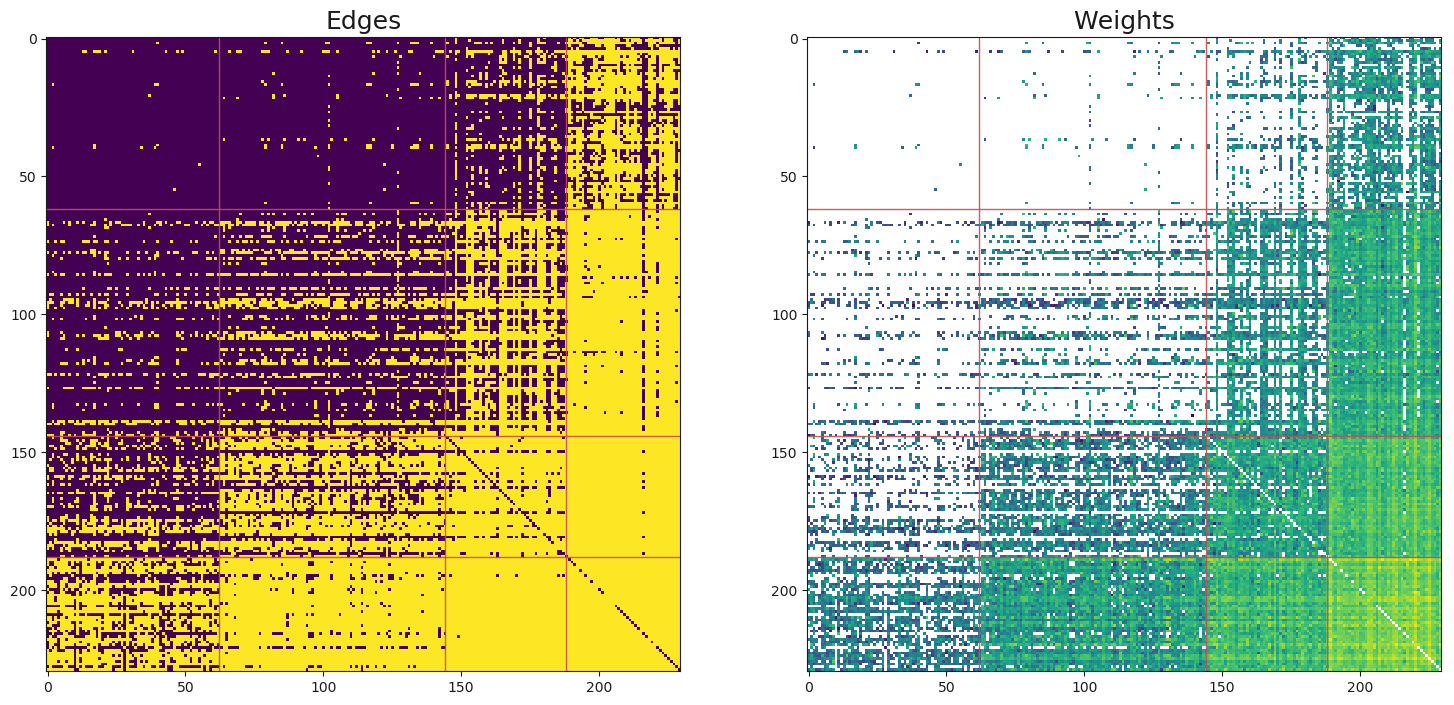

In [91]:
# Sort classes by the average in-weight/import (dim=0)
classes = q_eta.argmax(dim=0).float()
classes, perm = permute_by_degree(classes, A, 0)
order = classes.argsort()
cs = class_sizes(classes)
fig, axs = plt.subplots(1,2, figsize=(18,18))
axs[0].set_title('Edges', size=18)
axs[1].set_title('Weights', size=18)
axs[0].imshow(A_edges[order,:][:,order].numpy(), cmap='viridis')
acc = -1
for i in cs[:-1]:
    acc += i
    axs[0].axvline(acc, color='r', linestyle='-', linewidth=1, alpha=0.9)
    axs[0].axhline(acc, color='r', linestyle='-', linewidth=1, alpha=0.9)
axs[1].imshow(A.log()[order,:][:,order].numpy(), cmap='viridis')
acc = -1
for i in cs[:-1]:
    acc += i
    axs[1].axvline(acc, color='r', linestyle='-', linewidth=1, alpha=0.9)
    axs[1].axhline(acc, color='r', linestyle='-', linewidth=1, alpha=0.9)
plt.savefig('../examples/images/wt_A_wdcsbm.pdf')
plt.show()


In [92]:
print('Total #countries:', len(countries_id))
for i in classes.unique().sort().values:
    g = countries_id[classes==i]
    print('Class %d (%d countries):' % (i, len(g)))
    print(g)

Total #countries: 230
Class 0 (63 countries):
['ABW' 'AIA' 'AND' 'ASM' 'ATA' 'ATF' 'ATG' 'BDI' 'BMU' 'BTN' 'BVT' 'CAF'
 'CCK' 'COK' 'COM' 'CPV' 'CXR' 'CYM' 'DMA' 'ERI' 'ESH' 'FLK' 'FSM' 'GMB'
 'GNB' 'GRD' 'GRL' 'GUM' 'HMD' 'IOT' 'KIR' 'KNA' 'LCA' 'LSO' 'MDV' 'MNP'
 'MSR' 'MYT' 'NER' 'NFK' 'NIU' 'NRU' 'PCN' 'PLW' 'PSE' 'SGS' 'SHN' 'SLB'
 'SOM' 'SPM' 'STP' 'TCA' 'TCD' 'TKL' 'TLS' 'TON' 'TUV' 'UMI' 'VAT' 'VCT'
 'VUT' 'WLF' 'WSM']
Class 1 (82 countries):
['AFG' 'AGO' 'ALB' 'ANT' 'ARM' 'AZE' 'BEN' 'BFA' 'BHR' 'BHS' 'BIH' 'BLZ'
 'BOL' 'BRB' 'BRN' 'BWA' 'CMR' 'COD' 'COG' 'CUB' 'DJI' 'DOM' 'ETH' 'FJI'
 'FRO' 'GAB' 'GEO' 'GIB' 'GIN' 'GNQ' 'GTM' 'GUY' 'HND' 'HTI' 'IRQ' 'ISL'
 'JAM' 'KGZ' 'KHM' 'LAO' 'LBR' 'MAC' 'MDA' 'MDG' 'MHL' 'MKD' 'MLI' 'MMR'
 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'NAM' 'NCL' 'NIC' 'NPL' 'PNG' 'PRK'
 'PRY' 'PYF' 'RWA' 'SDN' 'SEN' 'SLE' 'SLV' 'SMR' 'SUR' 'SWZ' 'SYC' 'TGO'
 'TJK' 'TKM' 'TTO' 'TZA' 'UGA' 'UZB' 'VGB' 'YEM' 'ZMB' 'ZWE']
Class 2 (44 countries):
['BGD' 'BGR' 'BLR' 'C

In [118]:
import folium
world_json_path = '../data/World trade/world-countries.json'
countries_id = np.array(df.columns)
for c in range(len(countries_id)):
    countries_id[c] = countries_id[c].upper()
df_map = pd.DataFrame({'code':countries_id, 'val':classes.numpy()})
m = folium.Map(location=[0,0], zoom_start=2)

folium.Choropleth(
    geo_data=world_json_path,
    name='choropleth',
    data=df_map,
    columns=['code', 'val'],
    key_on='feature.id',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Classes',
    #bins=[0.,1.,2.,3.,4.,5.]
    bins=[-0.5,0.5,1.5,2.5,3.5]
).add_to(m)

folium.LayerControl().add_to(m)

m

In [94]:
nonempty_classes = q_eta.detach().argmax(dim=0).unique()[perm]
num_ne = len(nonempty_classes)

In [95]:
q_theta_nonempty = q_theta.detach()[nonempty_classes]
num_samples = 1000
theta_samples = Dirichlet(q_theta_nonempty).sample([num_samples])

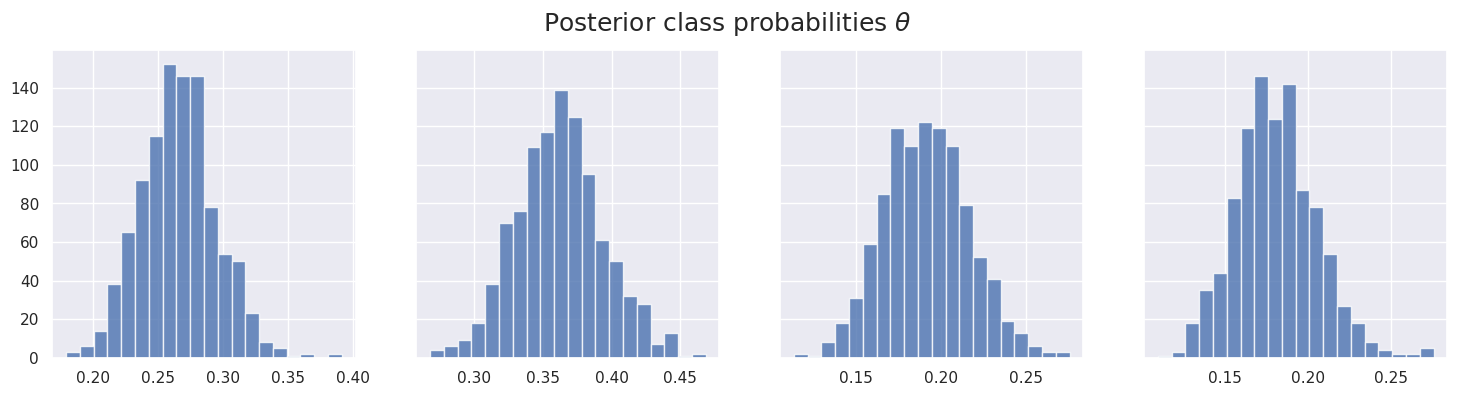

In [119]:
sns.set()
fig, axs = plt.subplots(1, num_ne, figsize=(18,4), sharey=True)
bins, alpha = 20, 0.8
for i in range(num_ne):
    axs[i].hist(theta_samples[:,i], bins=bins, alpha=alpha) 
fig.suptitle(r'Posterior class probabilities $\theta$', fontsize=18)
#plt.savefig('../examples/images/wt_theta_wdcsbm.pdf')
plt.show()

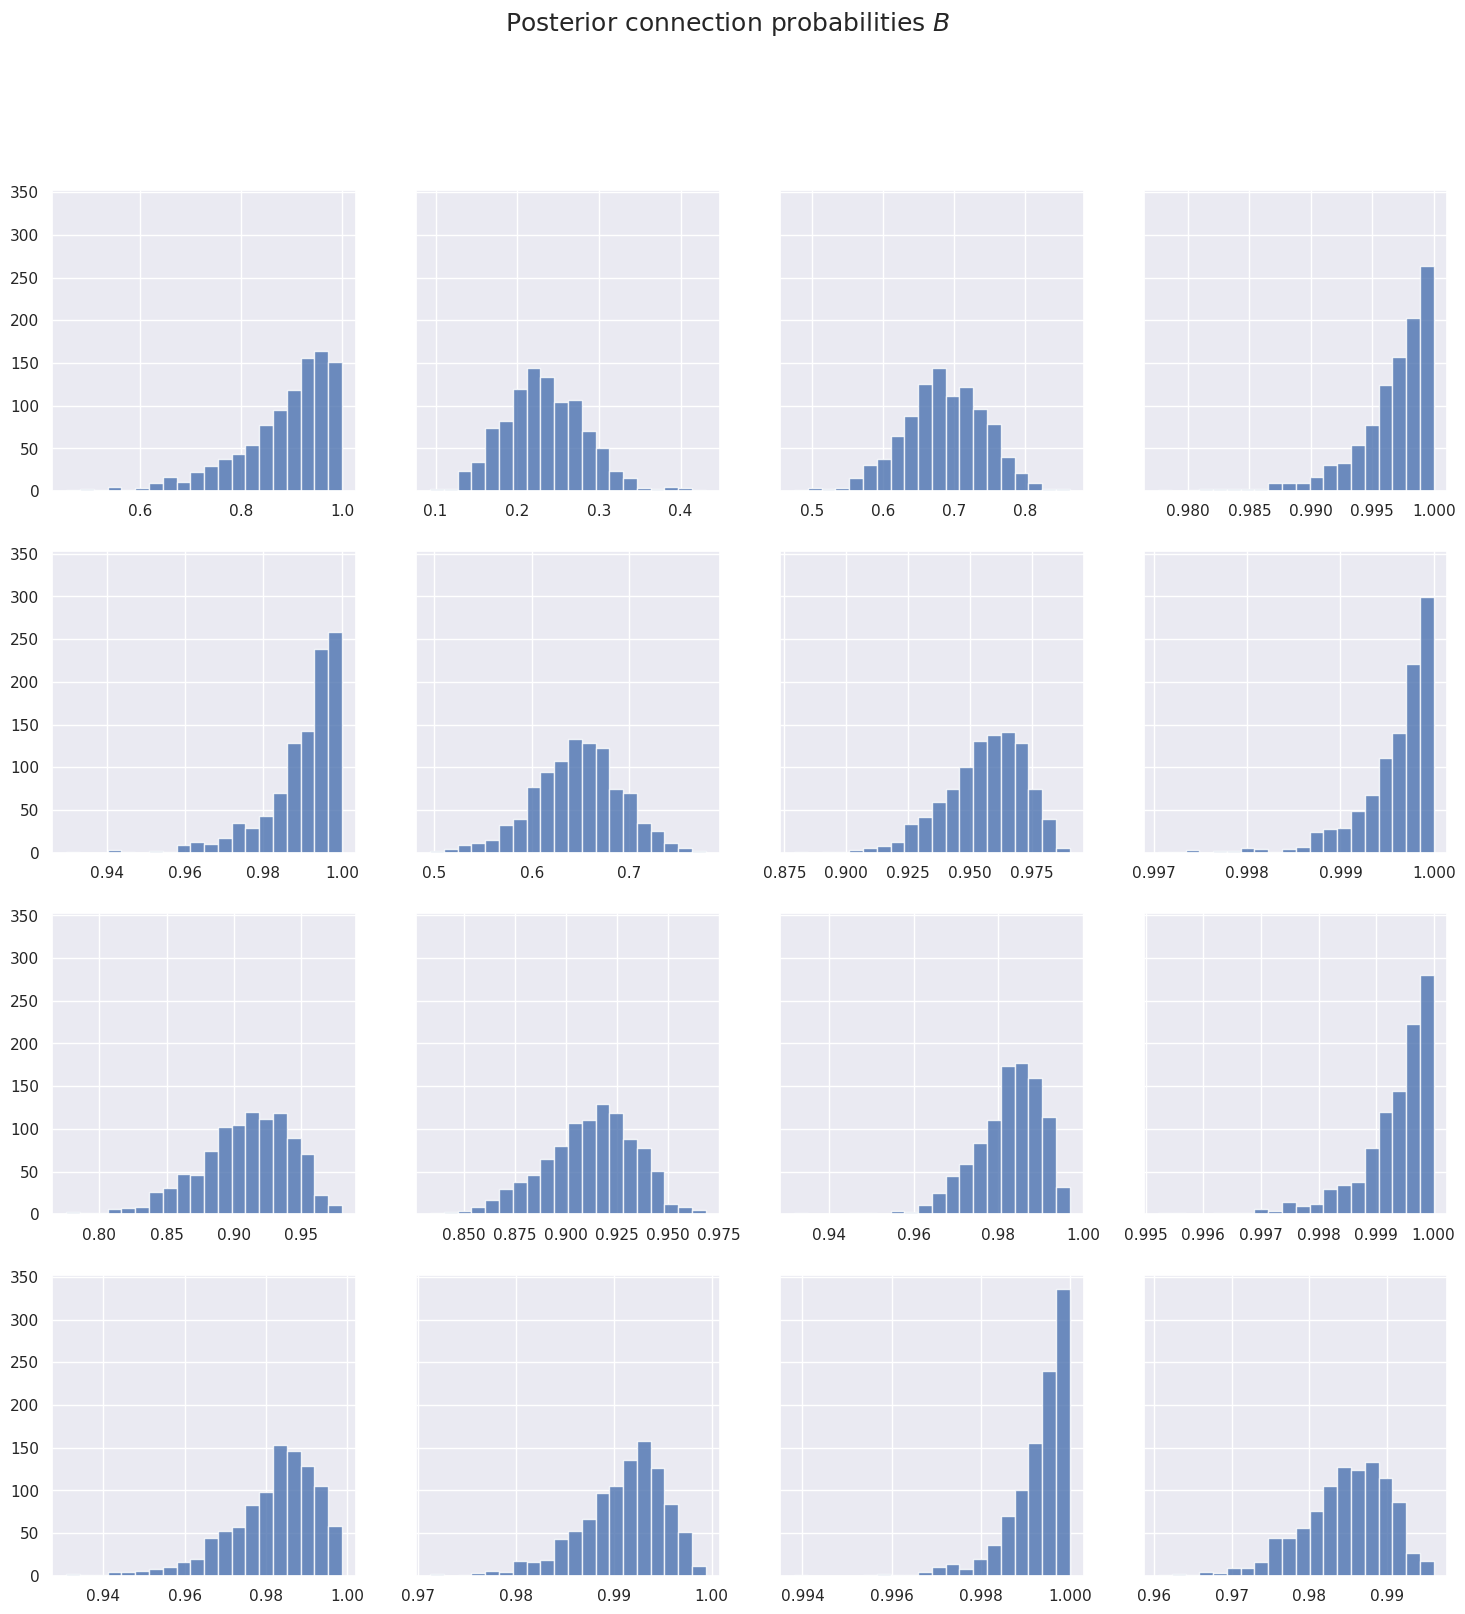

In [120]:
q_B_nonempty = q_B.detach()[nonempty_classes,:,:][:,nonempty_classes,:]
B_samples = Beta(q_B_nonempty[:,:,0], q_B_nonempty[:,:,1]).sample([num_samples])

fig, axs = plt.subplots(num_ne, num_ne, figsize=(18,18), sharey=True)
bins, alpha = 20, 0.8
for i in range(num_ne):
    for j in range(num_ne):
        axs[i,j].hist(B_samples[:,i, j], bins=bins, alpha=alpha) 
fig.suptitle(r'Posterior connection probabilities $B$', fontsize=18)
#plt.savefig('../examples/images/wt_B_wdcsbm.pdf')
plt.show()

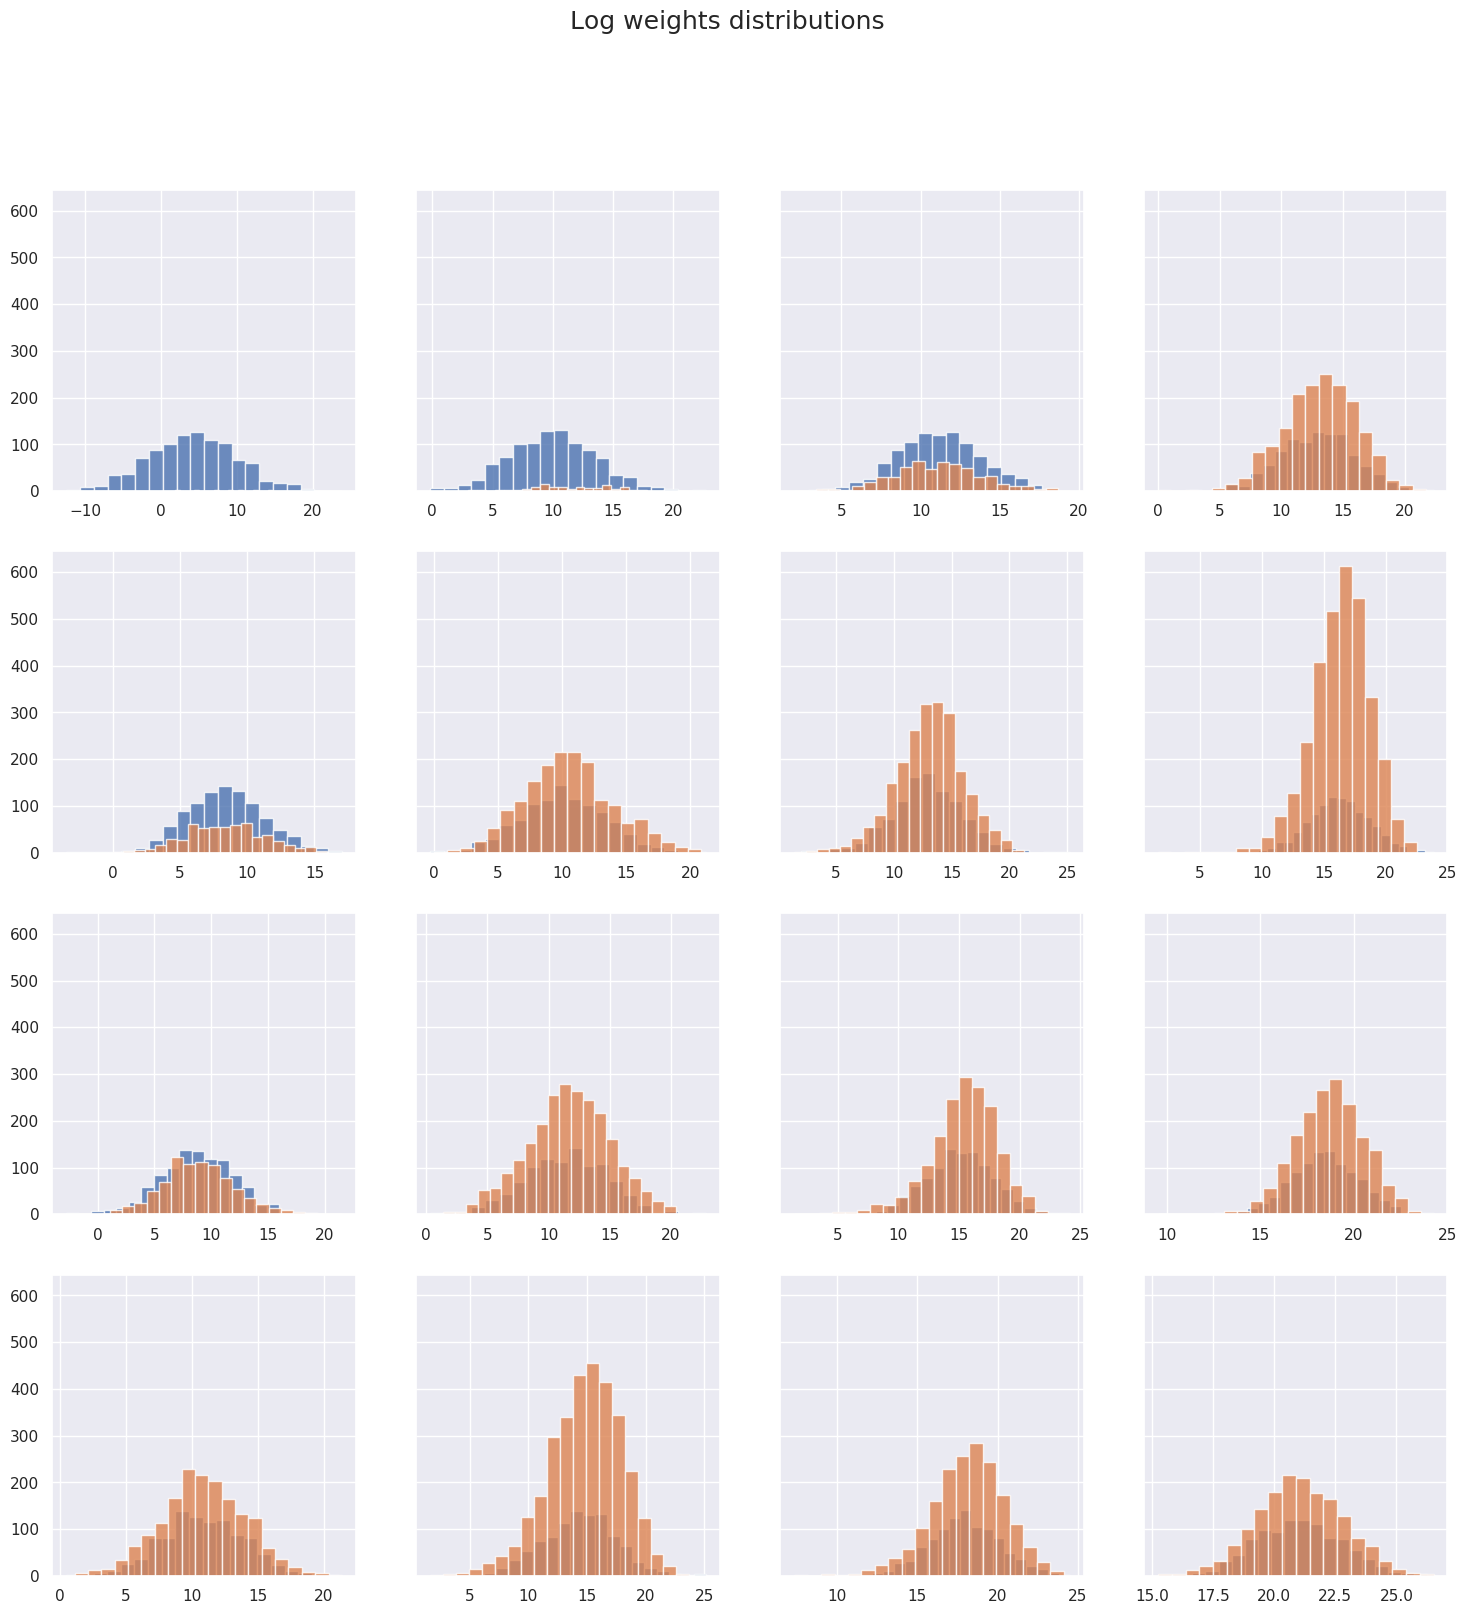

In [121]:
_,_,_,_, q_w_mu_mean, q_w_tau_mean = vi.qmean()    # Get the parameter means

from torch.distributions.log_normal import LogNormal
q_w_mu_mean_perm = q_w_mu_mean.detach()[nonempty_classes,:][:,nonempty_classes]
q_w_tau_mean_perm = q_w_tau_mean.detach()[nonempty_classes,:][:,nonempty_classes]
q_w_samples = LogNormal(q_w_mu_mean_perm, 1/q_w_tau_mean_perm.sqrt()).sample([num_samples]).log()
fig, axs = plt.subplots(num_ne, num_ne, figsize=(18,18), sharey=True)

bins, alpha = 20, 0.8
for i in range(num_ne):
    for j in range(num_ne):
        axs[i,j].hist(q_w_samples[:,i, j], bins=bins, alpha=alpha)
        A_ = A[classes==i,:][:,classes==j]
        x = A_[A_>0].flatten().log()
        if x.sum()>0:
            axs[i,j].hist(x, bins=bins, alpha=alpha)         
fig.suptitle(r'Log weights distributions', fontsize=18)
#plt.savefig('../examples/images/wt_w_wdcsbm.pdf')
plt.show()

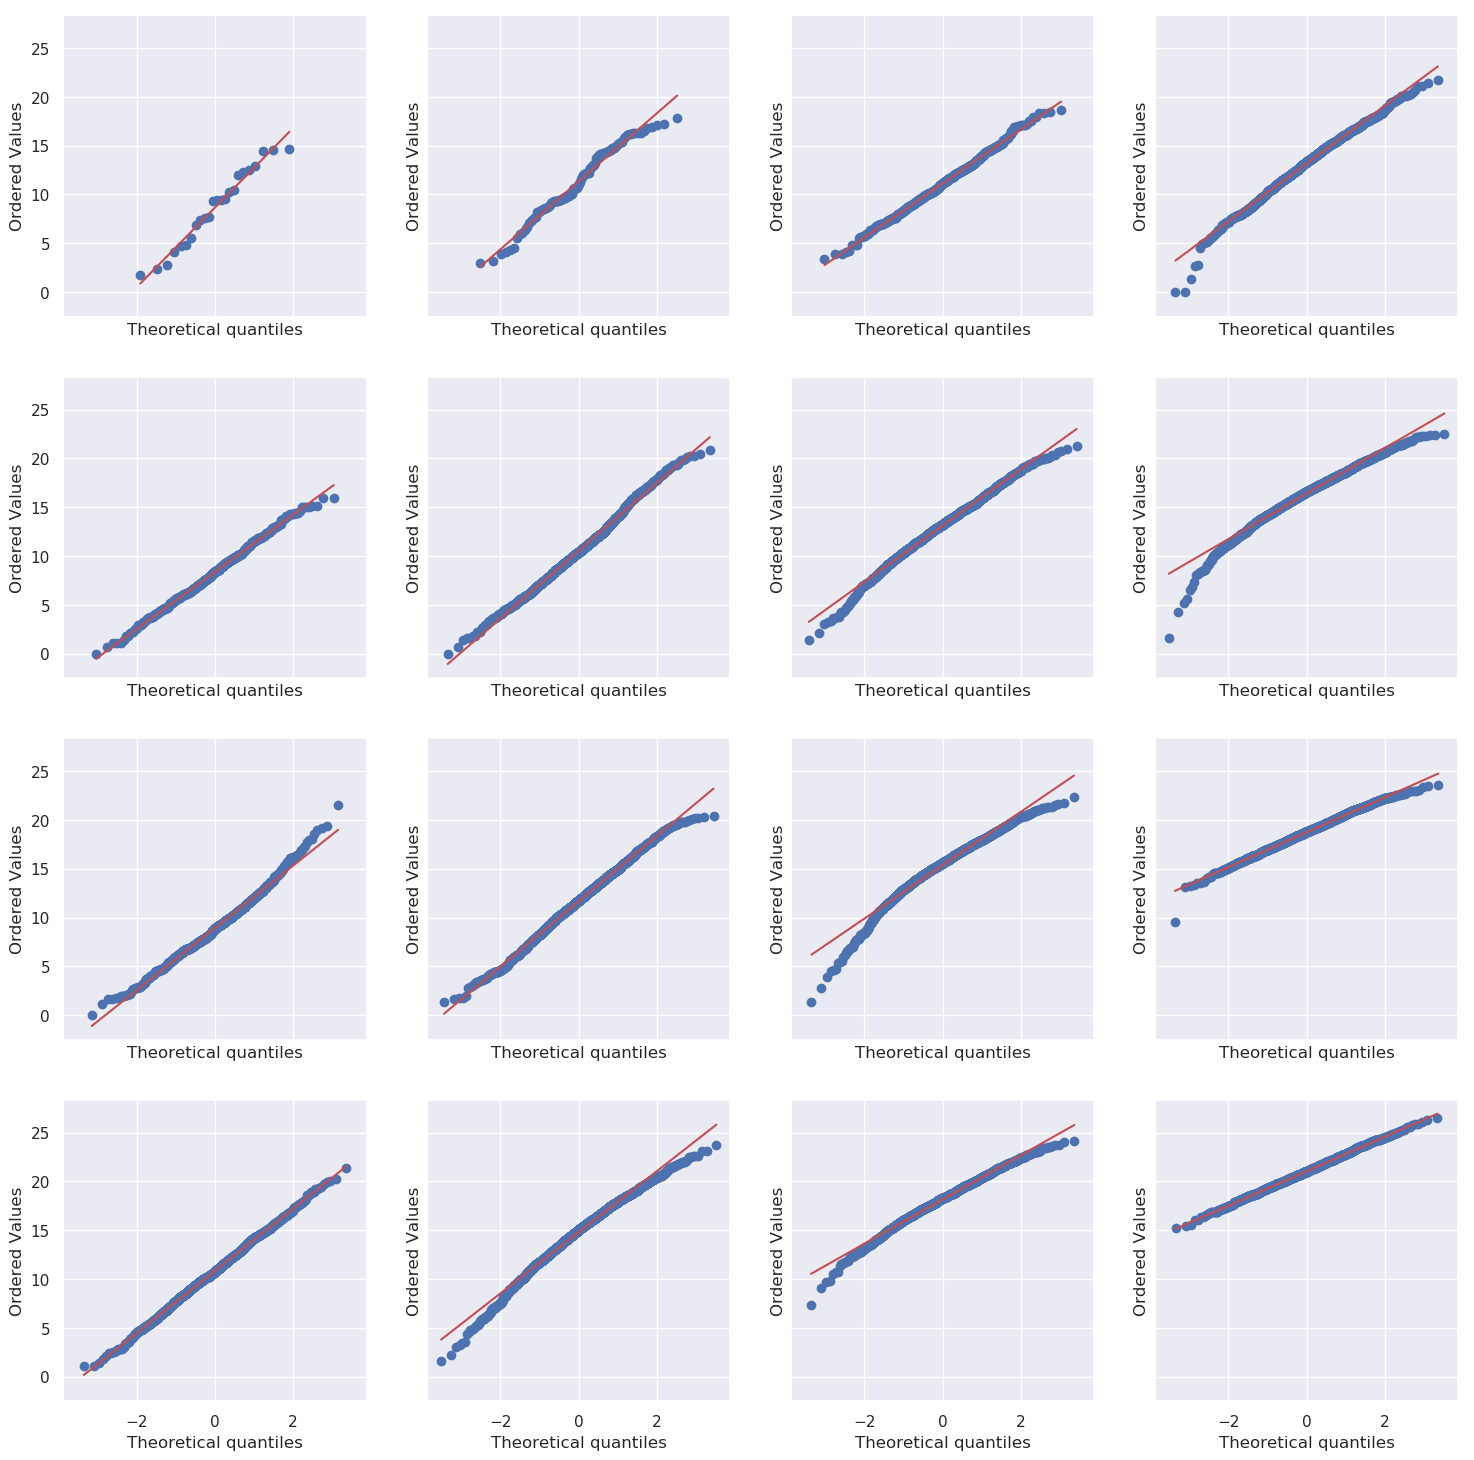

In [100]:
fig, axs = plt.subplots(num_ne, num_ne, figsize=(18,18), sharey=True, sharex=True)
for i in range(num_ne):
    for j in range(num_ne):
        A_ = A[classes==i,:][:,classes==j]
        #axs[i,j] = fig.add_subplot(num_ne, num_ne, 1+i*num_ne+j)
        x = A_[A_>0].flatten().log()
        if x.sum()>0:
            stats.probplot(x, dist="norm", plot=axs[i,j])
            axs[i,j].set_title('')
#plt.savefig('../examples/images/wt_probplot_wdcsbm.pdf')
plt.show()

The estimations produced by WDCSBM seem to be the most convinient. It groups countries into 4 classes by the size of their economy and their trade.